# $f (x) = \frac{1}{2} (x^2_1 + γx^2_2)$

##  Gradient descendent via exact line para exemplo da pagina 469



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

Nesse caso nossa função de custo será $f (x) = \frac{1}{2} (x^2_1 + γx^2_2)$,  onde $γ > 0$

In [ ]:
def cost_function(x, gamma):
    return 1/2 * (x[0]**2 + gamma *x[1]**2)

Primeiro para achar o vetor gradiente da função deveremos calcular as derivadas parciais.

$\frac{\partial f(x)}{\partial x_1}​= \frac{\partial}{\partial x_1}​(\frac{1}{2}​(x_1^2​+\gamma x_2^2​)) = x_1$

$\frac{\partial f(x)}{\partial x_2}​= \frac{\partial}{\partial x_2}​(\frac{1}{2}​(x_1^2​+\gamma x_2^2​)) = γx_2$

Logo o vetor gradiente é

$\nabla f(x) = \begin{bmatrix} \frac{\partial f(x)}{\partial x_1} \\ \frac{\partial f(x)}{\partial x_2} \end{bmatrix}  = \begin{bmatrix} x_1 \\ γx_2 \end{bmatrix} $

a implementação segue abaixo:

In [ ]:
# Gradiente da função de custo
def gradient(x, gamma):
    df_dx1 = x[0]
    df_dx2 = gamma * x[1]
    return np.array([df_dx1, df_dx2])


Vamos definir a função para calcular a norma do nosso vetor gradiente  $||\nabla f(x)||_2$, p. s. será nosso critério de parada quando for menor que $η$

In [ ]:
# Norma do vetor
def vector_norm(v):
    return np.linalg.norm(v)


Um método de busca por linha às vezes usado na prática é a busca por linha exata, em que t
é escolhido para minimizar f ao longo do raio $\{x + t∆x | t ≥ 0\}$ de forma:


 $t = argmin_{s≥0}  f (x + s∆x)$

In [ ]:
# # Busca Linear Exata para minimização em uma direção
def exact_line_search(x, direcao, gamma):
    a = np.dot(direcao, direcao) * gamma
    b = np.dot(x, direcao)
    t = -b / a if a != 0 else 0
    return max(t, 0)  # Garantir que o tamanho do passo seja não negativo

definindo funções para plotar a loss e as curvas de nivel

In [ ]:
def plot_curvas_nivel(gamma, x_values_exact_ls, func="Busca Linear exata"):
  # Plotando as curvas de nível
  x1 = np.linspace(-10, 10, 100)
  x2 = np.linspace(-4, 4, 100)
  X1, X2 = np.meshgrid(x1, x2)
  Z = cost_function(np.array([X1, X2]), gamma)


  plt.contour(X1, X2, Z, levels=np.logspace(-1, 10, 20))
  x_values_exact_ls = np.array(x_values_exact_ls)
  plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1],  marker="o", markeredgecolor="black", markerfacecolor='red', c= "black", label='Trajetória')
  #plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
  plt.title(f'Curvas de Nível da Função de Custo ({func})')

def plot_loss(cost_values_exact_ls, func="Busca Linear Exata"):
  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(cost_values_exact_ls) + 1), cost_values_exact_ls, marker='o')
  plt.xlabel('Número de Iterações')
  plt.ylabel('Erro (Função de Custo)')
  plt.title(f'Convergência do Gradiente Descendente ({func})')

implementação do algoritmo do gradiente descendente com exact line search


### Exact line search


In [ ]:
# Gradiente Descendente com Busca Linear Exata
def gradient_descent_exact_line_search(x_0, gamma, eta):
    x_values = []
    cost_values = []

    x = x_0

    while vector_norm(gradient(x, gamma)) > eta:
        grad = gradient(x, gamma)
        # Busca Linear Exata para encontrar o tamanho do passo
        t = exact_line_search(x, -grad, gamma)
        x = x - t * grad
        x_values.append(x)
        cost_values.append(cost_function(x, gamma))

    return x_values, cost_values


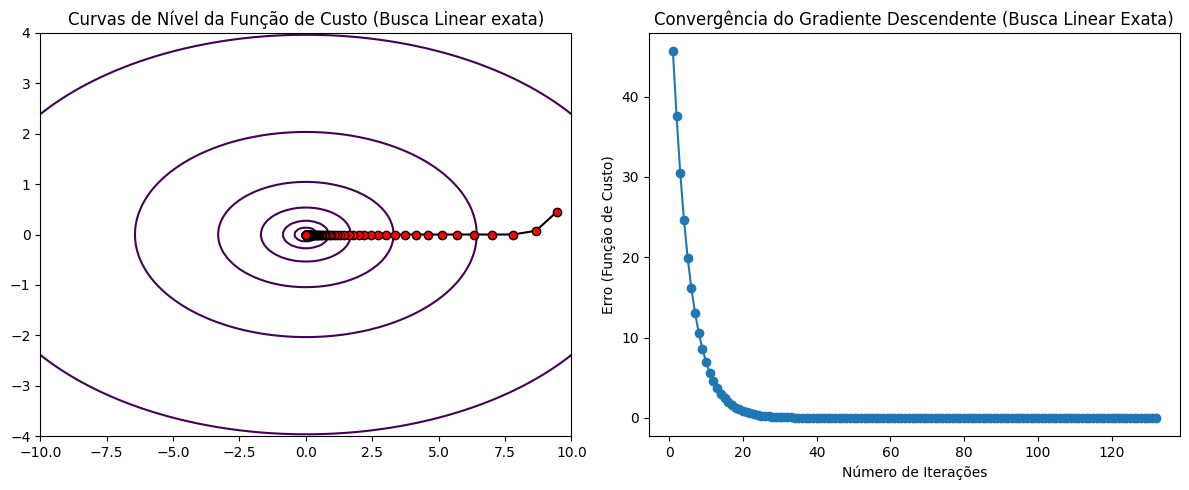

In [ ]:
# Configurações iniciais
x_0 = np.array([10.0, 1.0])
gamma = 10
eta = 1e-5

# Executando o gradiente descendente com Busca Linear Exata
x_values_exact_ls, cost_values_exact_ls = gradient_descent_exact_line_search(x_0, gamma, eta)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_curvas_nivel(gamma, x_values_exact_ls)
# Plotando o gráfico do erro em função do número de iterações
plot_loss(cost_values_exact_ls)

plt.tight_layout()

plt.savefig("ble_gd.png", dpi=300)
plt.show()

In [ ]:

# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')

# Testando diferentes valores de learning rate e gamma
learning_rates = [ 0.01,0.1, 0.001, 0.2]
gammas = [0.1, 1, 10]

for lr in learning_rates:
    for gamma in gammas:
        # Configurações iniciais
        x_0 = np.array([1.0, -1.0])
        eta = 1e-5

        # Executando o gradiente descendente com Busca Linear Exata
        _, cost_values = gradient_descent_exact_line_search(x_0, gamma, eta)

        # Verificando o custo final
        final_cost = cost_values[-1]

        # Armazenando os melhores parâmetros
        if final_cost < best_cost:
            best_cost = final_cost
            best_params = {'learning_rate': lr, 'gamma': gamma}

print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

Melhores parâmetros encontrados: {'learning_rate': 0.01, 'gamma': 1}
Custo mínimo: 0.0


<ipython-input-56-9ecf9e8087f7>:2: RuntimeWarning: overflow encountered in double_scalars
  return 1/2 * (x[0]**2 + gamma *x[1]**2)
<ipython-input-59-caecf729c316>:5: RuntimeWarning: invalid value encountered in double_scalars
  t = -b / a if a != 0 else 0


### backing track


In [ ]:
# Backtracking Line Search
def backtracking_line_search(x, gamma, grad, t=1.0, alpha=0.5, beta=0.8):
    while cost_function(x - t * grad, gamma) > cost_function(x, gamma) - alpha * t * np.dot(grad, grad):
        t *= beta
    return t


In [ ]:


# Gradiente Descendente com Line Search e Backtracking
def gradient_descent_line_search(x_0 , gamma, eta, lr, beta):
    x_values = []

    cost_values = []
    x = x_0
    while vector_norm(gradient(x, gamma)) > eta:
        grad = gradient(x, gamma)

        # Backtracking Line Search para encontrar o tamanho do passo
        t = backtracking_line_search(x, gamma, grad, alpha=lr, beta=beta)
        x = x - t * grad

        x_values.append(x)

        cost_values.append(cost_function(x, gamma))

    return x_values, cost_values



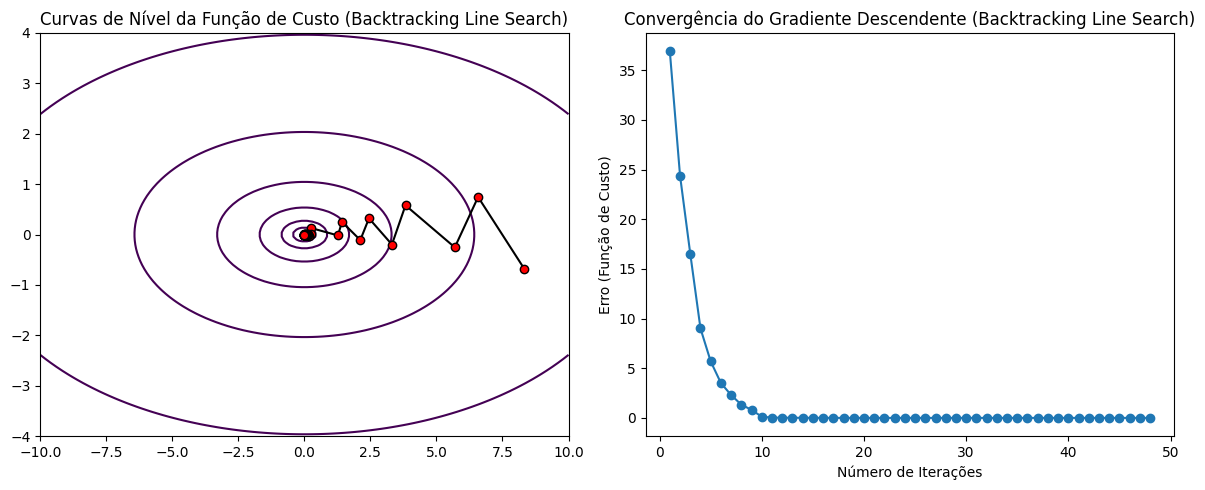

In [ ]:
# Configurações iniciais
x_0 = np.array([10.0, 1.0])
gamma = 10
eta = 1e-5

# Executando o gradiente descendente com Busca Linear Exata
x_values_exact_ls, cost_values_exact_ls = gradient_descent_line_search(x_0, gamma, eta,0.5, 0.8)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_curvas_nivel(gamma, x_values_exact_ls, "Backtracking Line Search")
# Plotando o gráfico do erro em função do número de iterações
plot_loss(cost_values_exact_ls,  "Backtracking Line Search")

plt.tight_layout()
plt.savefig("btls_gd.png", dpi=300)
plt.show()

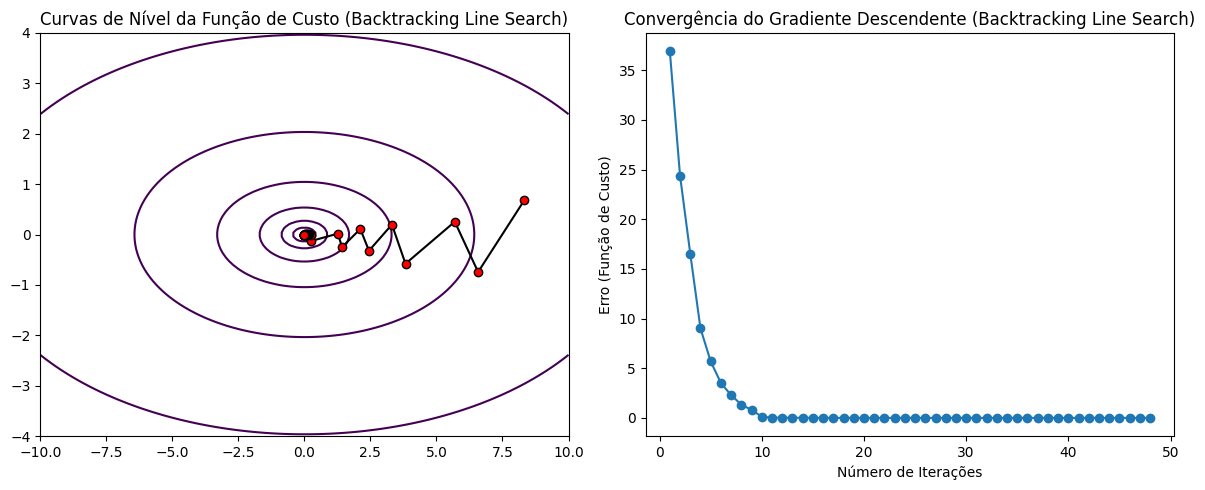

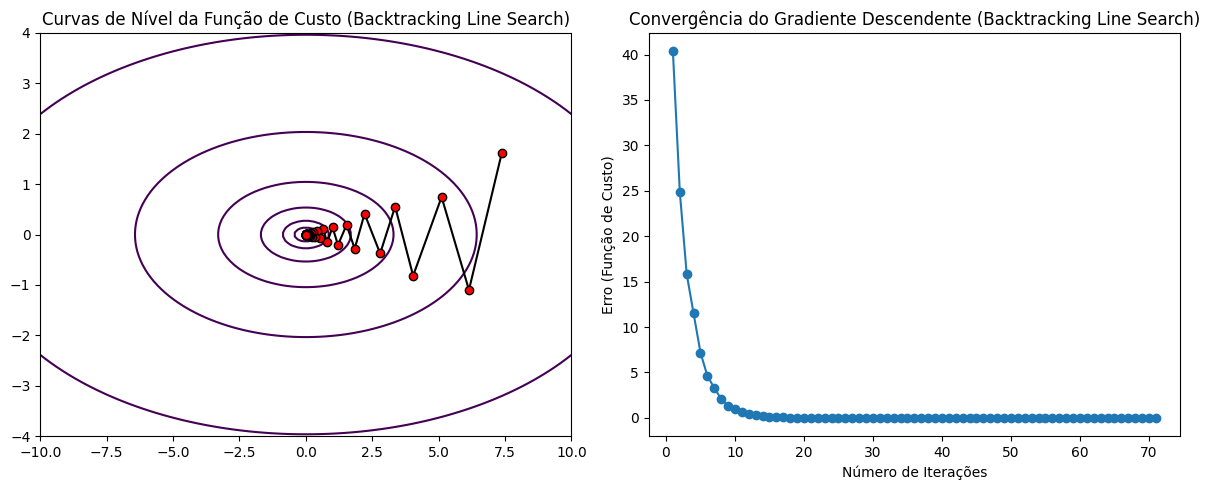

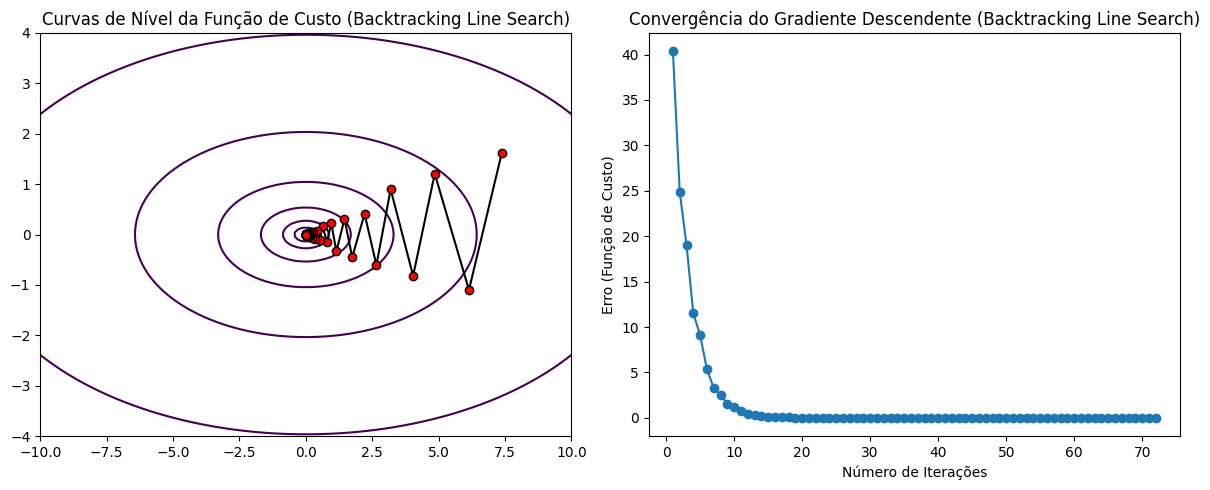

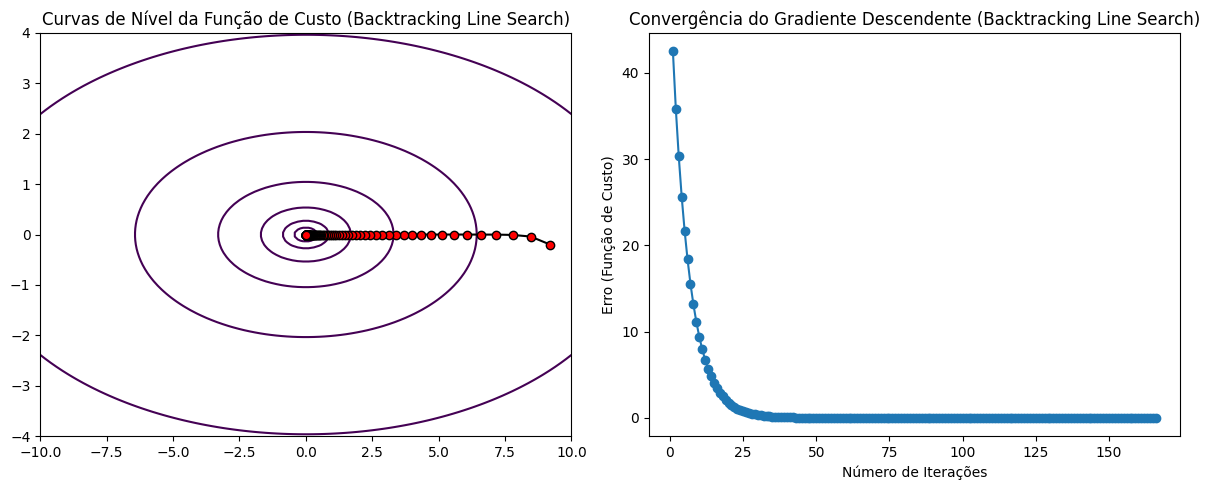

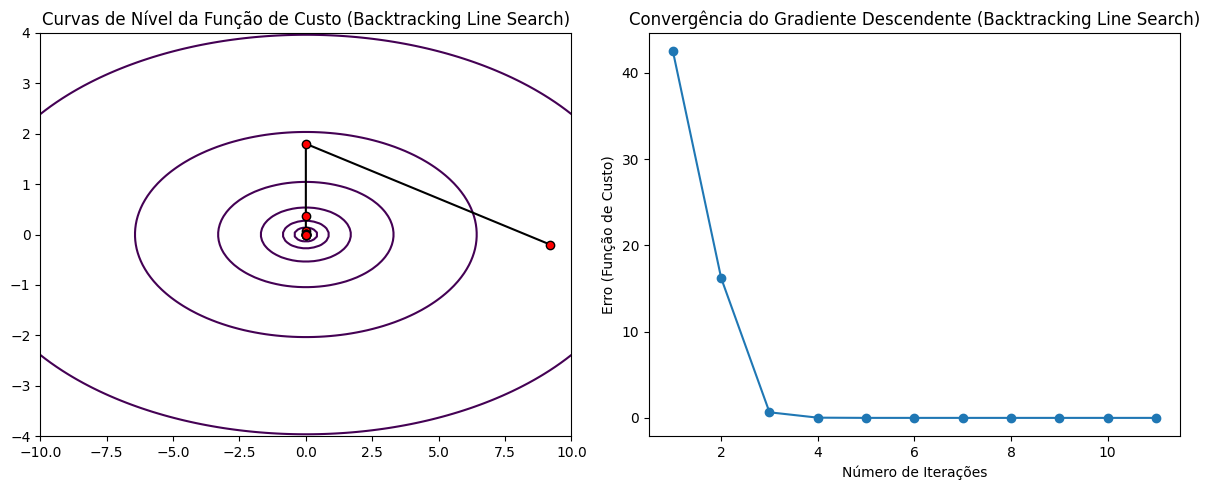

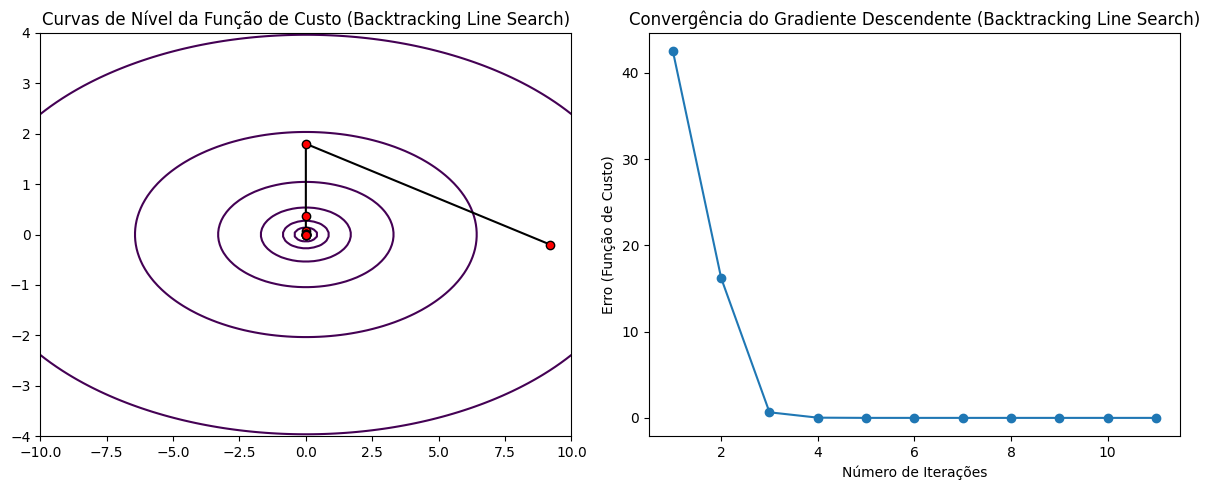

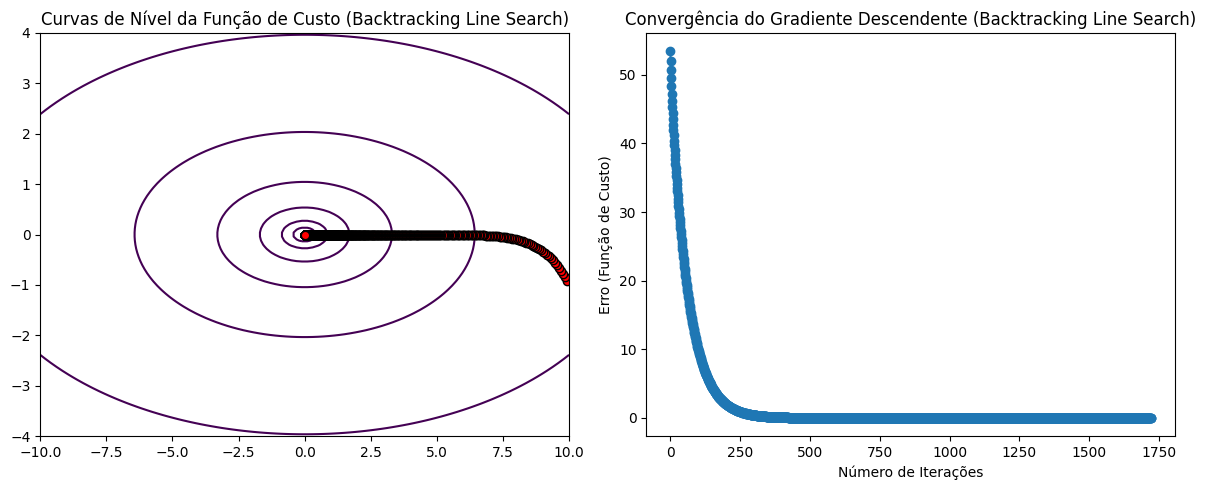

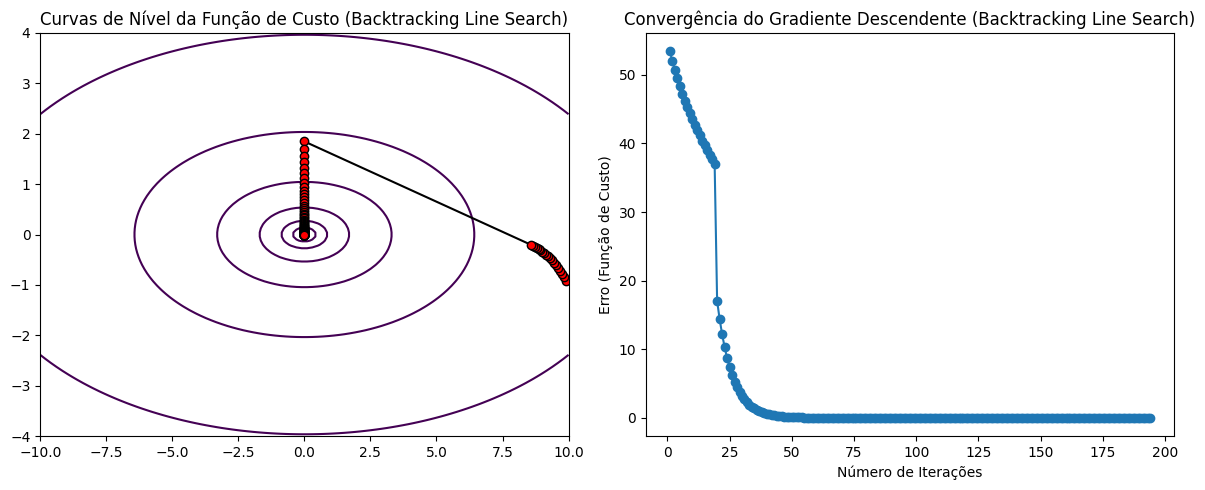

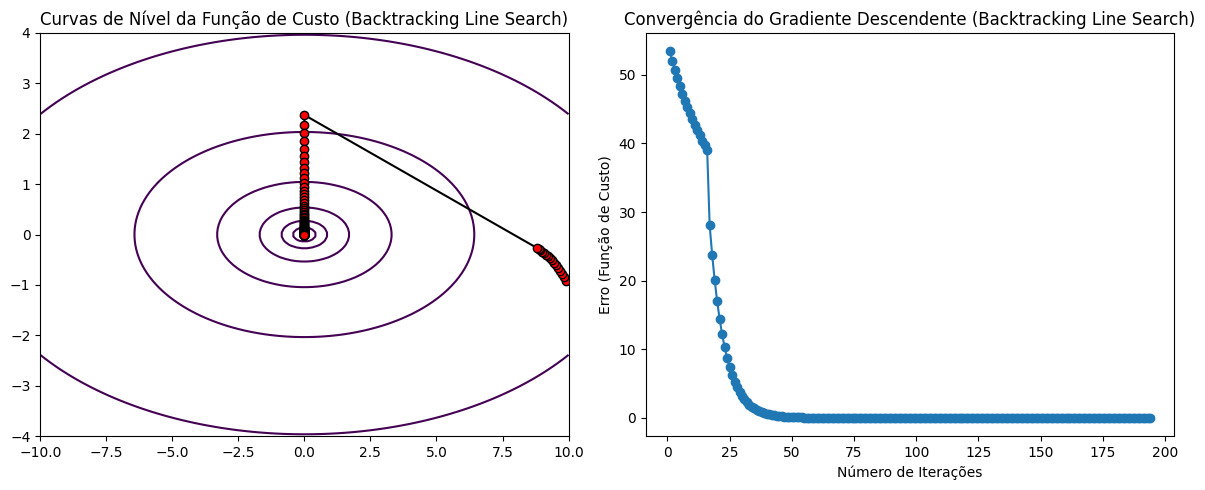

Melhores parâmetros encontrados: {'alpha': 0.25, 'gamma': 10, 'beta': 0.08}
Custo mínimo: 4.246732799999986e-12


In [ ]:

# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')

# Testando diferentes valores de learning rate e gamma
alphas = [ 1/2, 1/4, 1/8]
gamma = 10
betas = [8e-1, 8e-2,8e-3]

for beta in betas:
  for alpha in alphas:

        # Configurações iniciais
        x_0 = np.array([10.0, -1.0])

        eta = 1e-5

        # Executando o gradiente descendente com Busca Linear Exata
        x_values, cost_values  = gradient_descent_line_search(x_0, gamma, eta, alpha, beta)


        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plot_curvas_nivel(gamma, x_values,  "Backtracking Line Search")
        # Plotando o gráfico do erro em função do número de iterações
        plot_loss(cost_values,  "Backtracking Line Search")

        plt.tight_layout()
        plt.show()
        # Verificando o custo final
        final_cost = cost_values[-1]

        # Armazenando os melhores parâmetros
        if final_cost < best_cost:
            best_cost = final_cost
            best_params = {'alpha': alpha, 'gamma': gamma, "beta": beta}

print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

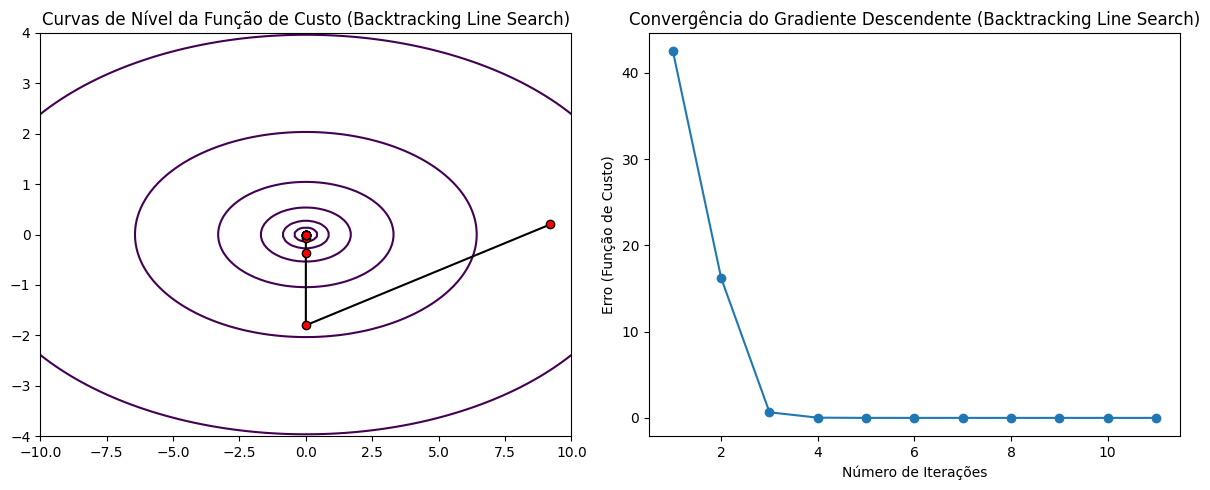

In [ ]:
# Configurações iniciais
x_0 = np.array([10.0, 1.0])
gamma = 10
eta = 1e-5

# Executando o gradiente descendente com Busca Linear Exata
x_values_exact_ls, cost_values_exact_ls = gradient_descent_line_search(x_0, gamma, eta,0.25, 0.08)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_curvas_nivel(gamma, x_values_exact_ls,  "Backtracking Line Search")
# Plotando o gráfico do erro em função do número de iterações
plot_loss(cost_values_exact_ls,  "Backtracking Line Search")

plt.tight_layout()
plt.savefig("btls_gd_optimal.png", dpi=300)
plt.show()


## Decida mais ingreme


norma quadratica é dada por $‖x‖_P = -P^{-1}\nabla f(x) $

In [ ]:
def quadratic_norm(gradient, P):
  return np.linalg.solve(P, gradient) # Multiplicação por P^-1

### Descida mais ingreme com exact line

In [ ]:

def steepest_descent_exact_line(x, gamma, P, learning_rate=0.1, tol=1e-5, max_iterations=100):
    iteration = 0
    norm_gradient_values = []
    x_values = []

    while iteration < max_iterations:
        grad = gradient(x, gamma)
        steepest_gradient_direction =  quadratic_norm(grad, P)
        norm_grad = np.linalg.norm(steepest_gradient_direction)

        if norm_grad < tol:
            break

        # Backtracking line search
        t = exact_line_search(x, -steepest_gradient_direction, gamma)

        x = x - t * steepest_gradient_direction
        x_values.append(x)
        norm_gradient_values.append(norm_grad)
        iteration += 1

    return x, cost_function(x, gamma), norm_gradient_values, x_values





Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [9.72041888e-06 0.00000000e+00]
Valor mínimo da função de custo: 4.724327163862047e-11
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [1.55330377e-05 2.34169354e-06]
Valor mínimo da função de custo: 1.26121158970319e-10
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [9.53674316e-06 9.53674316e-07]
Valor mínimo da função de custo: 4.638422979041934e-11
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [4.32199883e-05 1.74766037e-06]
Valor mínimo da função de custo: 9.370380099379496e-10


<Figure size 640x480 with 0 Axes>

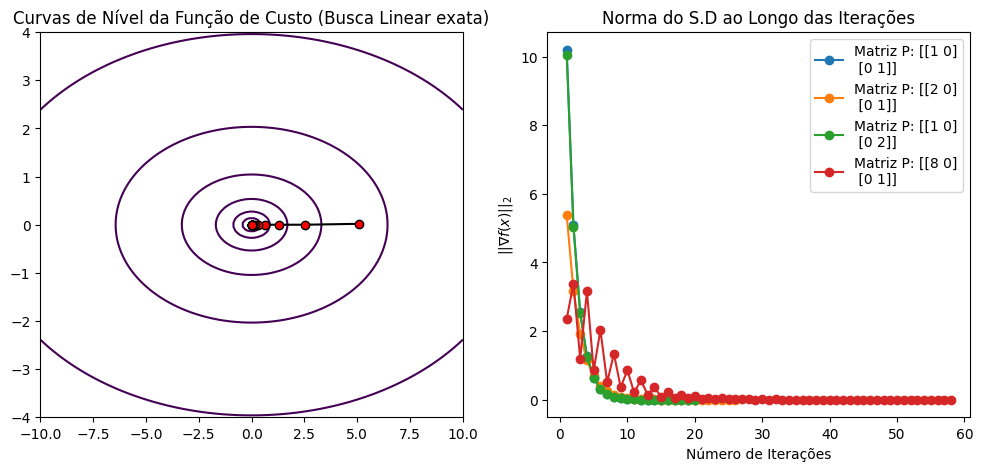

In [ ]:

# Experimente diferentes matrizes P
P_values = [np.diag([1, 1]), np.diag([2, 1]), np.diag([1, 2]),np.diag([8, 1])]

#preparando figura
plt.tight_layout()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)


for P in P_values:
    initial_point = np.array([10.0, 1.0])
    optimal_x, min_cost, norm_gradient_values, x_values_exact_ls = steepest_descent_exact_line(initial_point, gamma=2.0, P=P)

    print(f"Matriz P: \n{P}")
    print(f"Ponto ótimo encontrado: {optimal_x}")
    print(f"Valor mínimo da função de custo: {min_cost}")

    # Plotar a norma do gradiente ao longo das iterações
    plt.plot(range(1, len(norm_gradient_values) + 1), norm_gradient_values, marker='o', label=f'Matriz P: {P}')


# Configurações iniciais
x_0 = np.array([10.0, 1.0])
gamma = 10
eta = 1e-5



# Plotando o gráfico do erro em função do número de iterações



_, _, _, x_values_exact_ls  = steepest_descent_exact_line(x_0, gamma=2.0, P=P_values[0])

plt.title('Norma do S.D ao Longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel("$||\\nabla f(x)||_2$")
plt.legend()


plt.subplot(1, 2, 1)

plot_curvas_nivel(gamma, x_values_exact_ls)
plt.show()

### Descida mais ingreme via backtracking



In [ ]:


def steepest_descent_backing_tracking(x, gamma, P, alpha=0.1, beta=0.8,eta=1e-5, max_iterations=100):
    iteration = 0
    norm_gradient_values = []
    x_values = []

    while iteration < max_iterations:
        grad = gradient(x, gamma)
        steepest_gradiet_direction = quadratic_norm(grad, P)
        norm_grad = np.linalg.norm(steepest_gradiet_direction)

        if norm_grad < eta:
            break

        # Backtracking line search
        t = backtracking_line_search(x, gamma, steepest_gradiet_direction, alpha=alpha, beta=beta)
        x = x - t * steepest_gradiet_direction
        x_values.append(x)
        norm_gradient_values.append(norm_grad)
        iteration += 1

    return x, cost_function(x, gamma), norm_gradient_values, x_values



0.5
0.8
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 3.95052319e-06 -1.26414619e-06]
Valor mínimo da função de custo: 9.401382306487579e-12
0.5
0.8
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [ 7.10757201e-06 -2.84302880e-06]
Valor mínimo da função de custo: 3.334160269542153e-11
0.5
0.8
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.5
0.8
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [3.03527329e-05 7.89730223e-06]
Valor mínimo da função de custo: 5.230115789958945e-10


<Figure size 640x480 with 0 Axes>

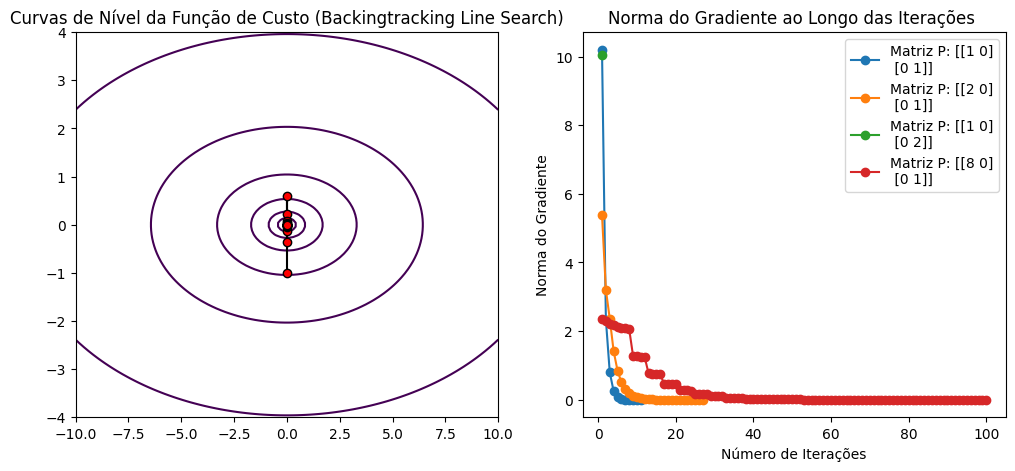

0.5
0.08
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [2.39211875e-03 2.67872793e-08]
Valor mínimo da função de custo: 2.861116049563326e-06
0.5
0.08
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [8.40964407e-06 4.20561304e-06]
Valor mínimo da função de custo: 5.3048237732612967e-11
0.5
0.08
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.5
0.08
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [0.00283887 0.00066028]
Valor mínimo da função de custo: 4.465560106144267e-06


<Figure size 640x480 with 0 Axes>

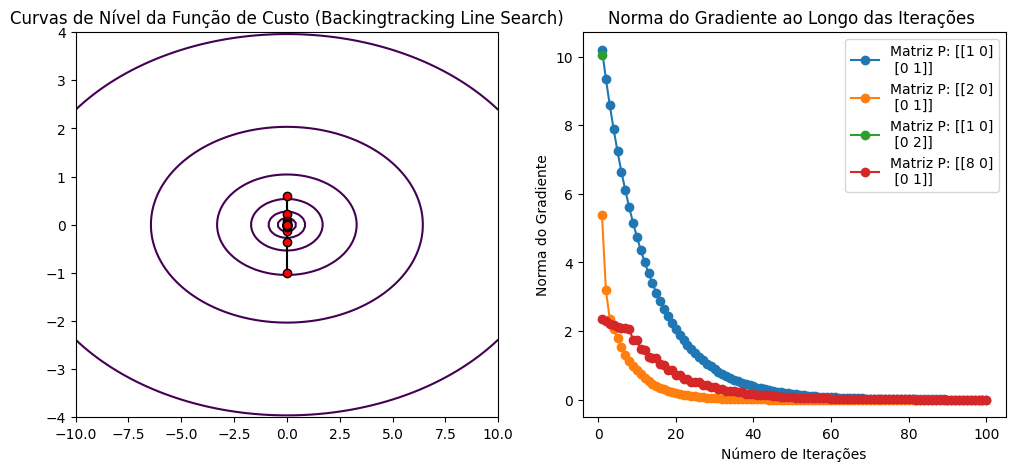

0.5
0.008
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [4.47885719 0.19930117]
Valor mínimo da função de custo: 10.069801837690207
0.5
0.008
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [0.42537945 0.21258345]
Valor mínimo da função de custo: 0.13566556140584476
0.5
0.008
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.5
0.008
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [1.08550008 0.25798132]
Valor mínimo da função de custo: 0.6557095744189948


<Figure size 640x480 with 0 Axes>

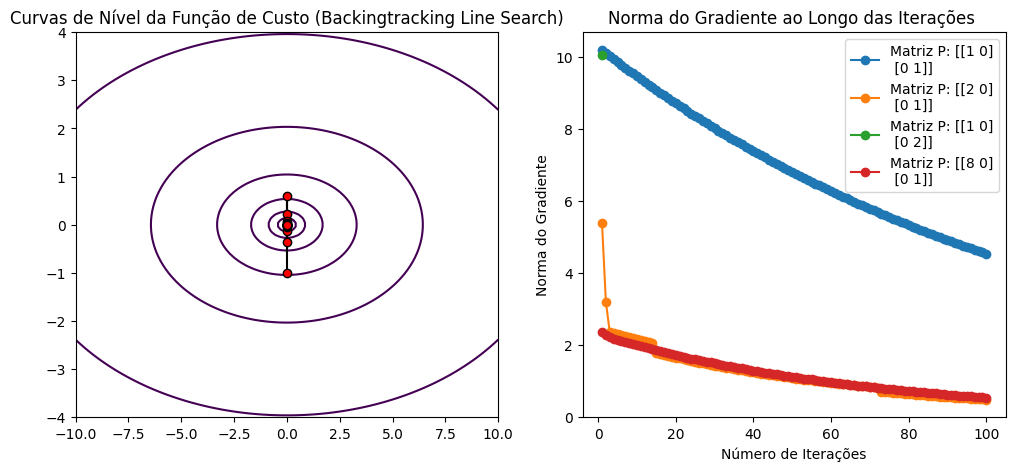

0.25
0.8
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.00000000e+00 -2.96196767e-06]
Valor mínimo da função de custo: 8.773252460082505e-12
0.25
0.8
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [ 5.92297667e-06 -4.73838134e-06]
Valor mínimo da função de custo: 3.9993084041225446e-11
0.25
0.8
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.25
0.8
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [3.03527329e-05 7.89730223e-06]
Valor mínimo da função de custo: 5.230115789958952e-10


<Figure size 640x480 with 0 Axes>

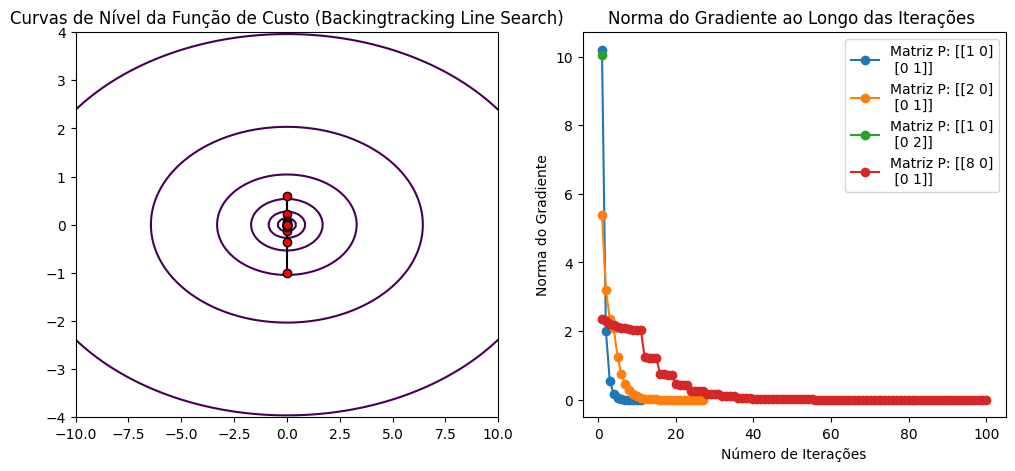

0.25
0.08
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.00000000e+00 -4.20561304e-06]
Valor mínimo da função de custo: 1.7687181025911352e-11
0.25
0.08
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [8.40964407e-06 4.20561304e-06]
Valor mínimo da função de custo: 5.3048237732612967e-11
0.25
0.08
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.25
0.08
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.0025091  -0.00078605]
Valor mínimo da função de custo: 3.765669567977307e-06


<Figure size 640x480 with 0 Axes>

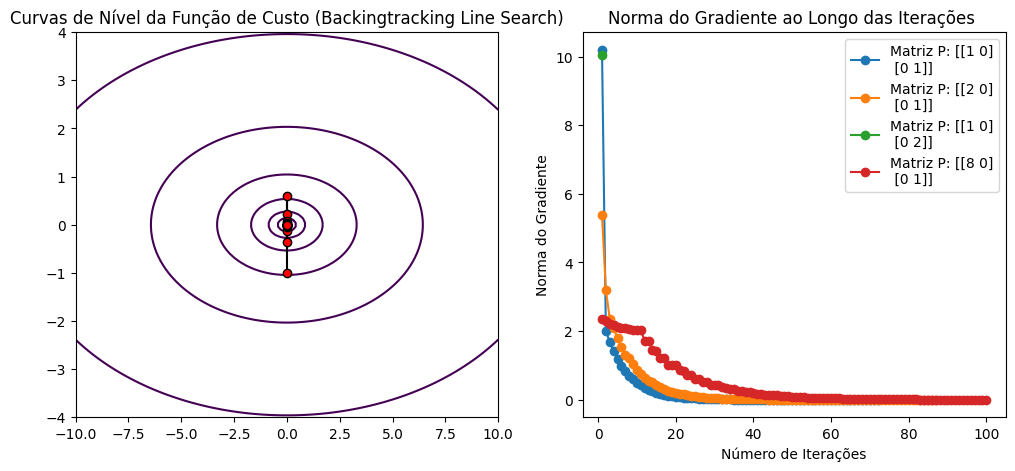

0.25
0.008
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.         -0.20254184]
Valor mínimo da função de custo: 0.04102319575562296
0.25
0.008
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.2135439  -0.21604009]
Valor mínimo da função de custo: 0.06947381960627348
0.25
0.008
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.25
0.008
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.72938622 -0.27077151]
Valor mínimo da função de custo: 0.33931934117589635


<Figure size 640x480 with 0 Axes>

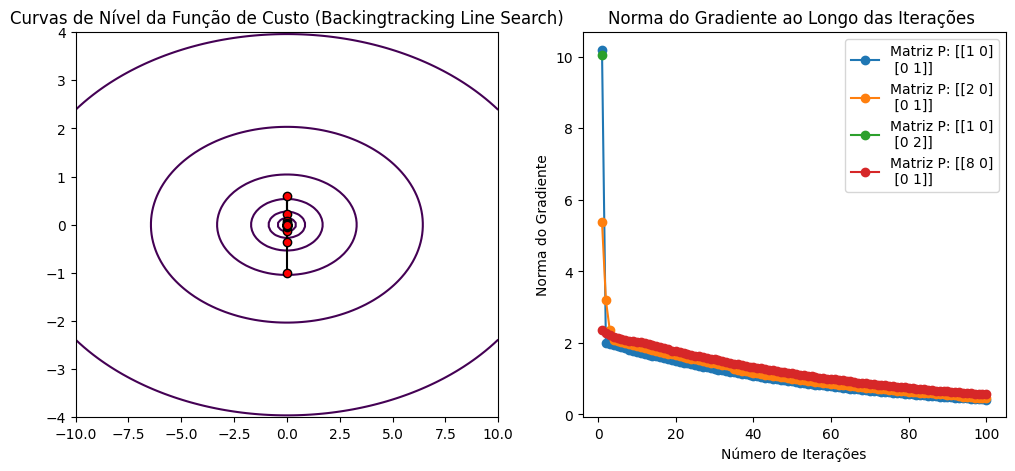

0.125
0.8
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.00000000e+00 -4.73838134e-06]
Valor mínimo da função de custo: 2.2452257707354733e-11
0.125
0.8
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [2.96148834e-06 4.73838134e-06]
Valor mínimo da função de custo: 2.6837464290822413e-11
0.125
0.8
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.125
0.8
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [2.95096014e-05 1.31621704e-05]
Valor mínimo da função de custo: 6.086510167870307e-10


<Figure size 640x480 with 0 Axes>

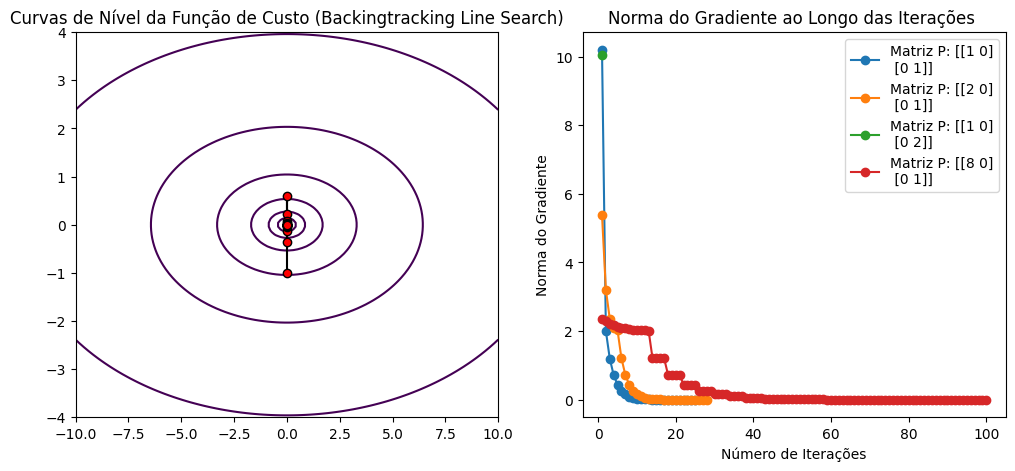

0.125
0.08
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.00000000e+00 -4.20561304e-06]
Valor mínimo da função de custo: 1.7687181025911352e-11
0.125
0.08
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [ 4.20482204e-06 -4.20561304e-06]
Valor mínimo da função de custo: 2.6527445202586758e-11
0.125
0.08
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.125
0.08
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [0.00221764 0.00093578]
Valor mínimo da função de custo: 3.3346375318792876e-06


<Figure size 640x480 with 0 Axes>

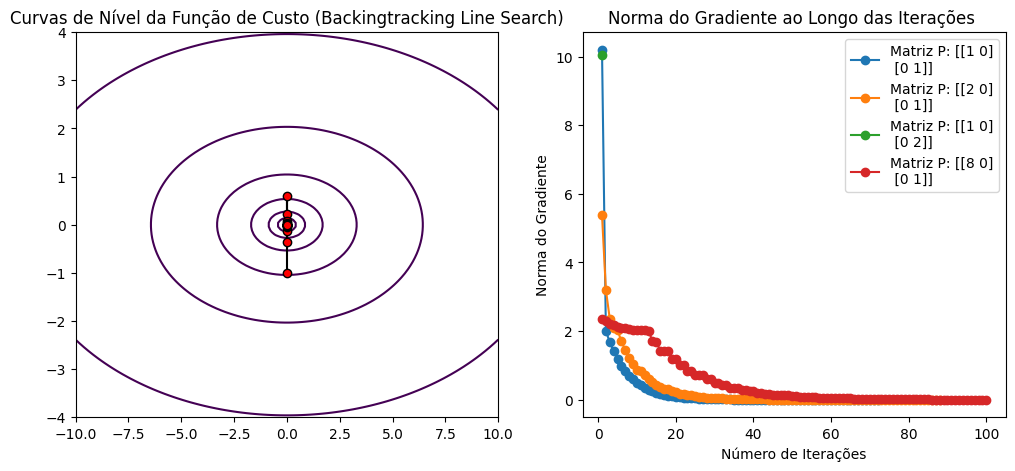

0.125
0.008
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.         -0.20254184]
Valor mínimo da função de custo: 0.04102319575562296
0.125
0.008
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.2135439  -0.21604009]
Valor mínimo da função de custo: 0.06947381960627348
0.125
0.008
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
0.125
0.008
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.55955487 -0.27964868]
Valor mínimo da função de custo: 0.2347542138094853


<Figure size 640x480 with 0 Axes>

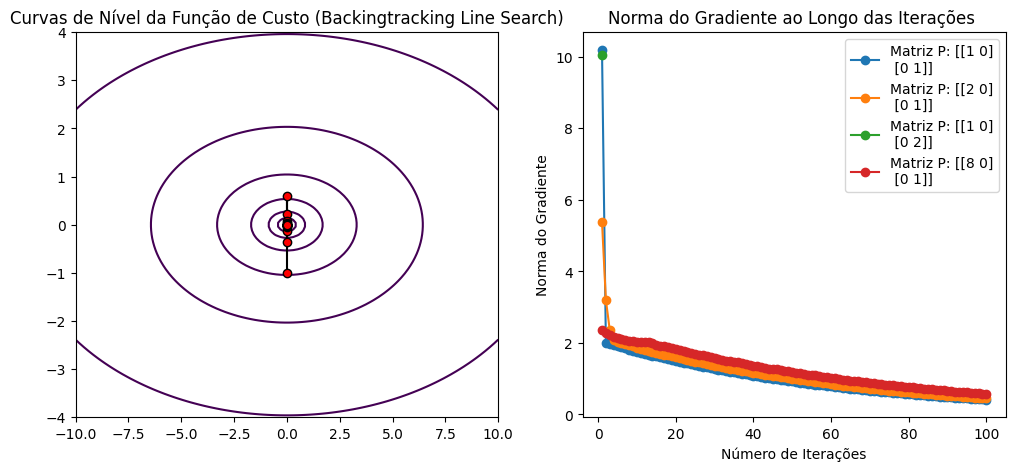

Melhores parâmetros encontrados: {'alpha': 0.25, 'gamma': 2, 'beta': 0.08, 'P': array([[1, 0],
       [0, 1]])}
Custo mínimo: 1.0013364376336474e-05


In [ ]:

# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')


# Experimente diferentes matrizes P
P_values = [np.diag([1, 1]), np.diag([2, 1]), np.diag([1, 2]),np.diag([8, 1])]


for alpha in alphas:
  for beta in betas:
    plt.tight_layout()
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    for P in P_values:
        initial_point = np.array([10, 1.0])
        optimal_x, min_cost, norm_gradient_values, x_values_exact_ls = steepest_descent_backing_tracking(initial_point, gamma=2, P=P, alpha=alpha, beta=beta)
        print(alpha)
        print(beta)
        print(f"Matriz P: \n{P}")
        print(f"Ponto ótimo encontrado: {optimal_x}")
        print(f"Valor mínimo da função de custo: {min_cost}")

        # Plotar a norma do gradiente ao longo das iterações
        plt.plot(range(1, len(norm_gradient_values) + 1), norm_gradient_values, marker='o', label=f'Matriz P: {P}')
        final_cost = norm_gradient_values[-1]
        # Armazenando os melhores parâmetros
        if final_cost < best_cost:
            best_cost = final_cost
            best_params = {'alpha': alpha, 'gamma': 2, "beta": beta, "P":P}

    plt.title('Norma do Gradiente ao Longo das Iterações ')
    plt.xlabel('Número de Iterações')
    plt.ylabel('Norma do Gradiente')
    plt.legend()

    # Configurações iniciais
    x_0 = np.array([10.0, 1.0])
    gamma = 10
    eta = 1e-5





    _, _, _, x_values_exact_ls  = steepest_descent_backing_tracking(x_0, gamma=2.0, P=P_values[0])



    plt.subplot(1, 2, 1)
    plot_curvas_nivel(gamma, x_values_exact_ls, "Backingtracking Line Search")
      #plt.savefig("std_P_loco.png", dpi=300)
    plt.show()

print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.00000000e+00 -4.20561304e-06]
Valor mínimo da função de custo: 1.7687181025911352e-11
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [8.40964407e-06 4.20561304e-06]
Valor mínimo da função de custo: 5.3048237732612967e-11
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [0. 0.]
Valor mínimo da função de custo: 0.0
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [ 0.0025091  -0.00078605]
Valor mínimo da função de custo: 3.765669567977307e-06


<Figure size 640x480 with 0 Axes>

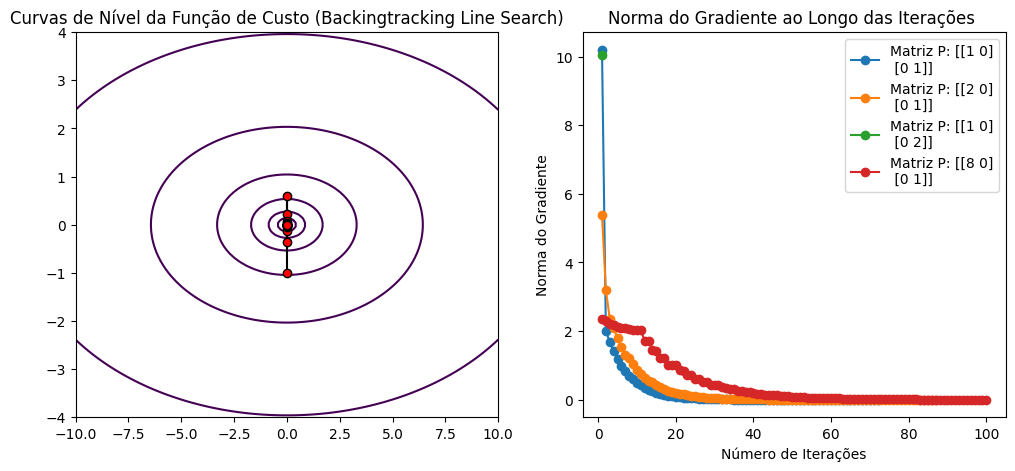

In [ ]:
plt.tight_layout()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
for P in P_values:
        initial_point = np.array([10, 1.0])
        optimal_x, min_cost, norm_gradient_values, x_values_exact_ls = steepest_descent_backing_tracking(initial_point, gamma=2, P=P, alpha=0.25, beta=0.08)

        print(f"Matriz P: \n{P}")
        print(f"Ponto ótimo encontrado: {optimal_x}")
        print(f"Valor mínimo da função de custo: {min_cost}")

        # Plotar a norma do gradiente ao longo das iterações
        plt.plot(range(1, len(norm_gradient_values) + 1), norm_gradient_values, marker='o', label=f'Matriz P: {P}')

plt.title('Norma do Gradiente ao Longo das Iterações ')
plt.xlabel('Número de Iterações')
plt.ylabel('Norma do Gradiente')
plt.legend()

# Configurações iniciais
x_0 = np.array([10.0, 1.0])
gamma = 10
eta = 1e-5



_, _, _, x_values_exact_ls  = steepest_descent_backing_tracking(x_0, gamma=2.0, P=P_values[0])



plt.subplot(1, 2, 1)
plot_curvas_nivel(gamma, x_values_exact_ls, "Backingtracking Line Search")
plt.savefig("std_P_otimssso.png", dpi=300)
plt.show()


### verificando o condicionamento de cada P


In [ ]:
for P in P_values:
   print(f"Condicionamento da matriz {np.linalg.cond(P)}")
   print(f"Post da matriz {np.linalg.matrix_rank(P)}")

Condicionamento da matriz 1.0
Post da matriz 2
Condicionamento da matriz 2.0
Post da matriz 2
Condicionamento da matriz 2.0
Post da matriz 2
Condicionamento da matriz 8.0
Post da matriz 2


## Metodo de Newton


$H(f)=
\begin{bmatrix}  \frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1 \partial x_2} \\  \frac{\partial^2f}{\partial x_1 \partial x_2} & \frac{\partial^2f}{\partial x_2^2} \end{bmatrix} =
\begin{bmatrix}
 \frac{\partial^2f}{\partial x_1^2} & 0 \\
 0 & \frac{\partial^2f}{\partial x_2^2}
\end{bmatrix}
$

onde  $\frac{\partial f(x)}{\partial x_1} = x_1$ e $\frac{\partial f(x)}{\partial x_2} = γx_2 $

Tirando as derivadas parciais segundas temos
$\frac{\partial^2 f(x)}{\partial x_1} = 1$ e $\frac{\partial^2f(x)}{\partial x_2} = γ $

Então a Hessiana é:
\begin{bmatrix}
 1 & 0 \\
 0 & \gamma
\end{bmatrix}

Como a implementação da função de custo e do gradienta foram feitos anteriormente, vou adicionar a implementação da hessiana.

In [ ]:
# Matriz Hessiana da função de custo
def hessian(gamma):
    return np.array([[1, 0], [0, gamma]])



Algorithm 9.5 Newton’s method.
given a starting point $x \in dom f$ , tolerance $\epsilon > 0$.repeat
  1. Compute the Newton step and decrement.
  ∆xnt := −∇2f (x)−1∇f (x); λ2 := ∇f (x)T ∇2f (x)−1∇f (x).
  2. Stopping criterion. quit if λ2/2 ≤ ǫ.
  3. Line search. Choose step size t by backtracking line search.
  4. Update. x := x + t∆xnt.




In [ ]:


# Método de Newton com busca de retrocesso
def newton_backtracking(x_0, gamma, epsilon=1e-6,alpha=0.5,beta=0.8, max_iterations=100):
    x = np.array(x_0, dtype=float)
    x_values = [x]
    cost_values = []

    while True:
        grad = gradient(x, gamma)
        hess = hessian(gamma)
        hess_inv = np.linalg.inv(hess)


        lambda_2 = grad.T @ hess_inv @ grad
        # Direção de descida
        direction = -hess_inv @ grad

        if lambda_2/2 <= epsilon:
          break
        # Busca de retrocesso
        t = backtracking_line_search(x, gamma, grad, alpha, beta)

        # Atualiza a posição
        x = x + t * direction
        x_values.append(x)
        cost_values.append(cost_function(x, gamma))


    return x_values, cost_values


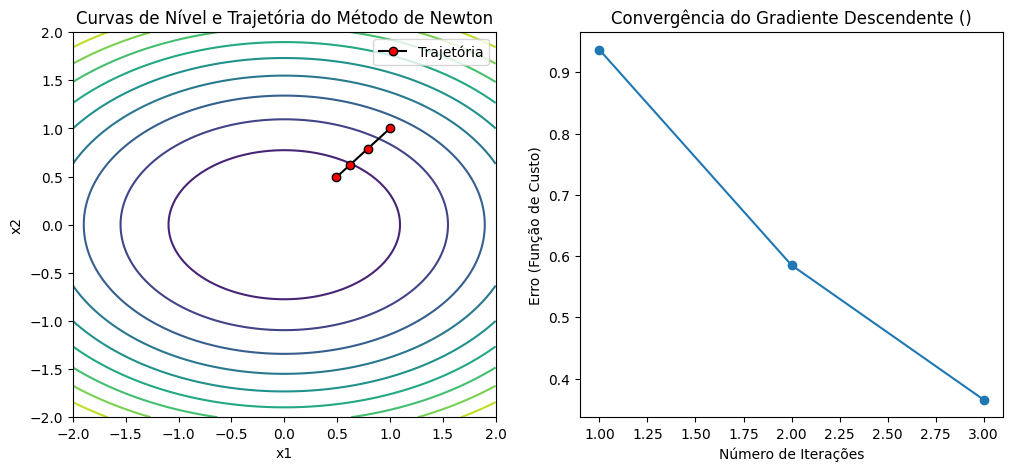

Alpha: 0.5  Beta:0.8


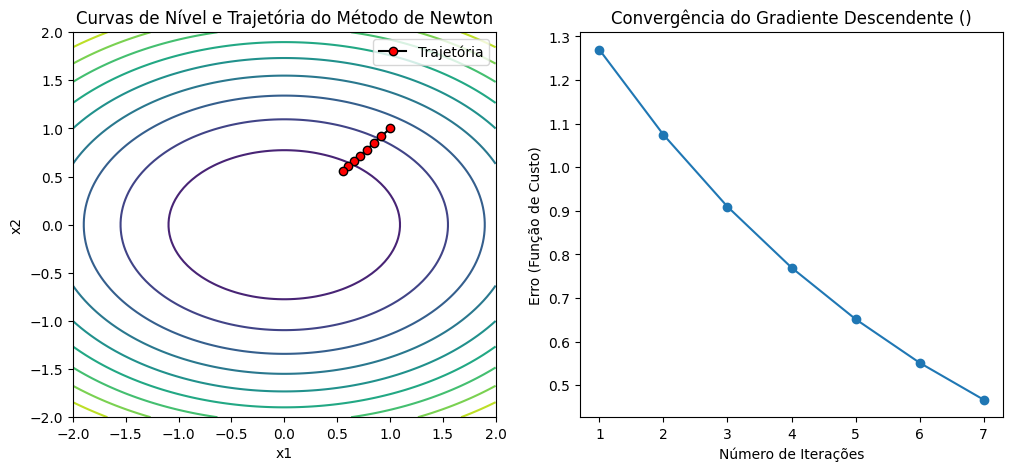

Alpha: 0.5  Beta:0.08


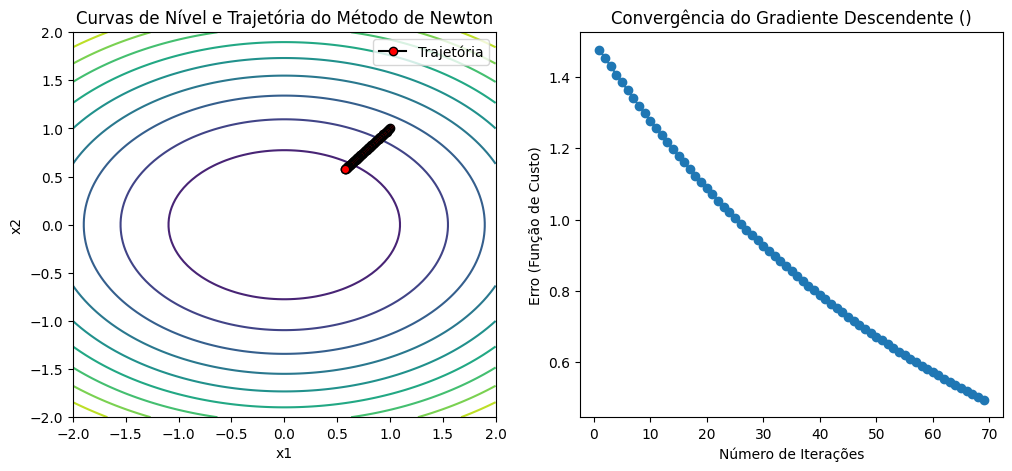

Alpha: 0.5  Beta:0.008


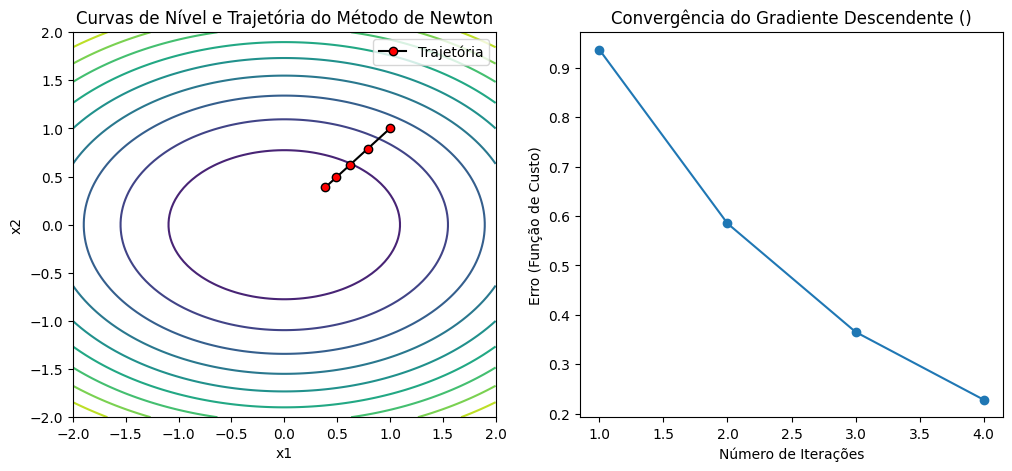

Alpha: 0.25  Beta:0.8


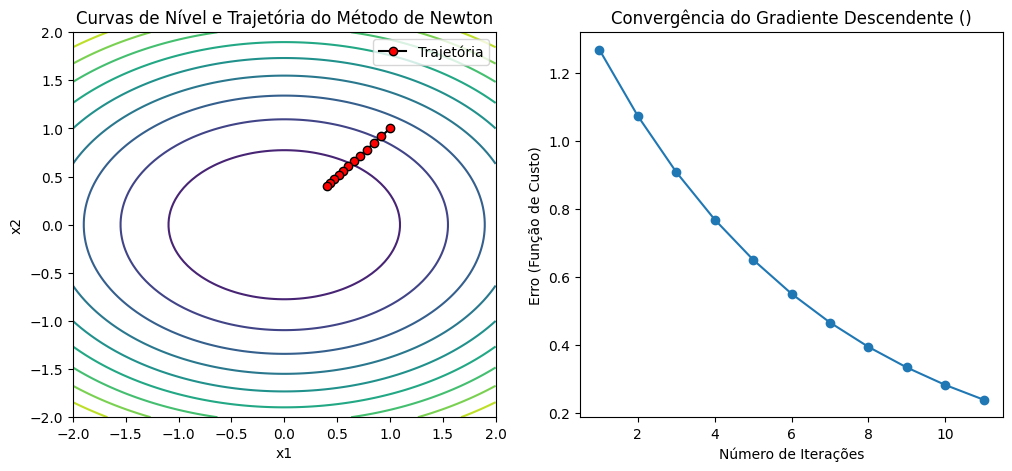

Alpha: 0.25  Beta:0.08


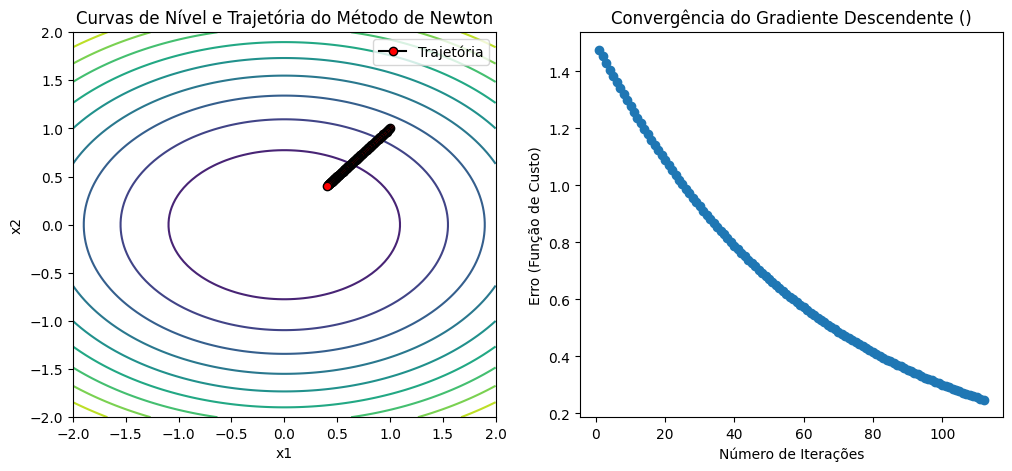

Alpha: 0.25  Beta:0.008


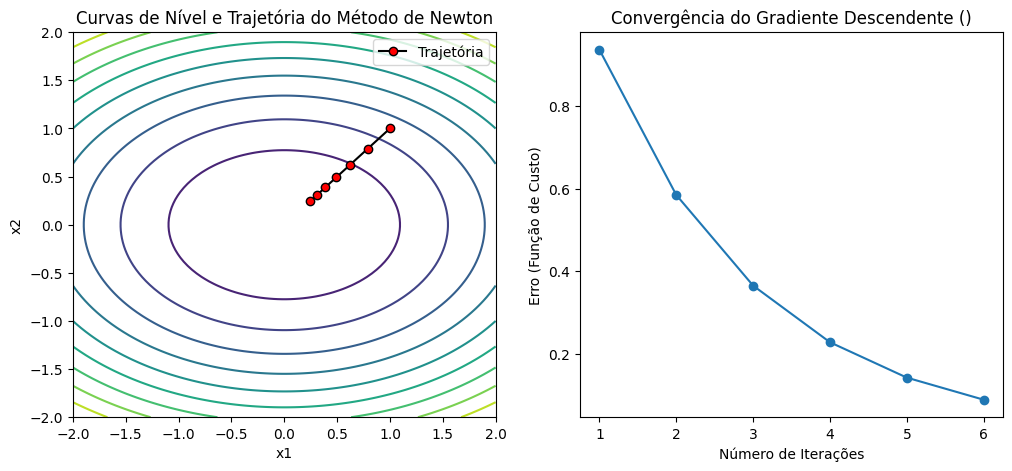

Alpha: 0.125  Beta:0.8


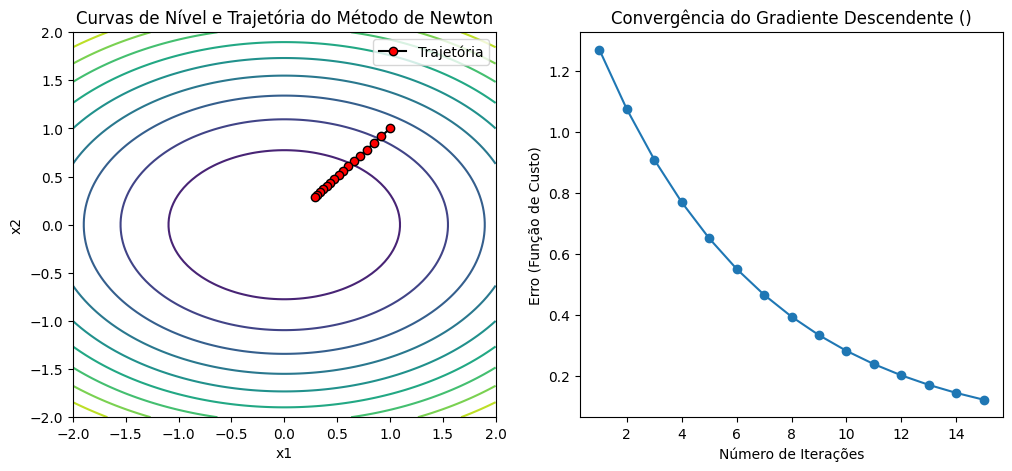

Alpha: 0.125  Beta:0.08


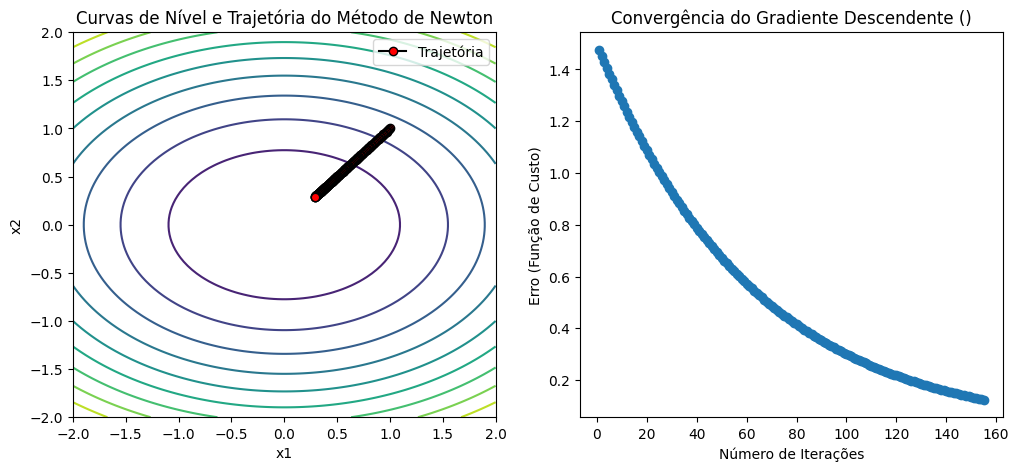

Alpha: 0.125  Beta:0.008
Melhores parâmetros encontrados: {'alpha': 0.125, 'beta': 0.8}
Custo mínimo: 0.08902147931082979


In [ ]:
# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')


# Parâmetros
gamma = 2.0
initial_point = [1.0, 1.0]
for alpha in alphas:
  for beta in betas:
    # Executa o método de Newton com busca de retrocesso
    x_values, cost_values = newton_backtracking(initial_point, gamma, alpha, beta)

    final_cost = cost_values[-1]
        # Armazenando os melhores parâmetros
    if final_cost < best_cost:
        best_cost = final_cost
        best_params = {'alpha': alpha,  "beta": beta}


    x_values = np.array(x_values)
    # Plotagem das curvas de nível
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = 0.5 * (X1**2 + gamma * X2**2)


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.contour(X1, X2, Z, levels=10)
    plt.plot(x_values[:, 0], x_values[:, 1], marker="o", markeredgecolor="black", markerfacecolor='red', c= "black", label='Trajetória')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Curvas de Nível e Trajetória do Método de Newton')
    plt.legend()


    plt.subplot(1, 2, 2)
    plot_loss(cost_values, "")
    plt.show()
    print(f"Alpha: {alpha}  Beta:{beta}")

print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

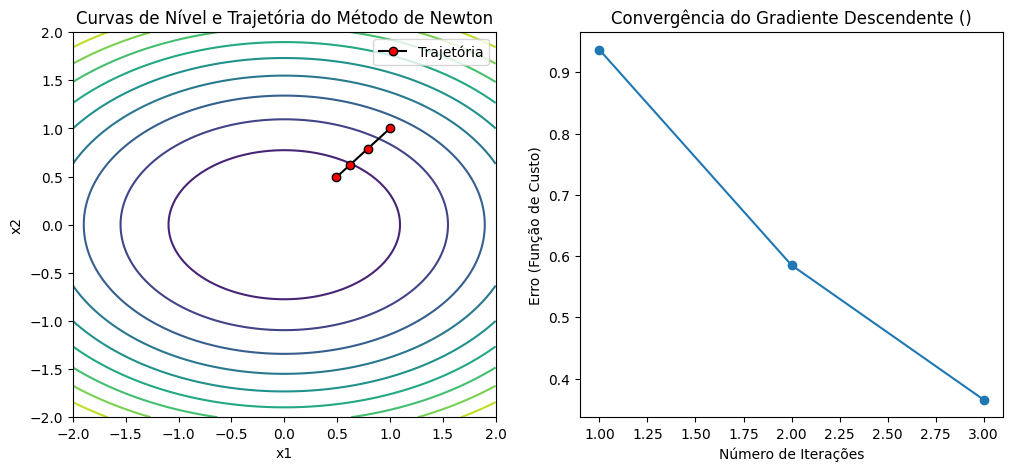

Alpha: 0.125  Beta:0.008


In [ ]:
x_values, cost_values = newton_backtracking(initial_point, gamma, 0.5, 0.8)

final_cost = cost_values[-1]
    # Armazenando os melhores parâmetros
if final_cost < best_cost:
    best_cost = final_cost
    best_params = {'alpha': alpha,  "beta": beta}


x_values = np.array(x_values)
# Plotagem das curvas de nível
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 * (X1**2 + gamma * X2**2)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contour(X1, X2, Z, levels=10)
plt.plot(x_values[:, 0], x_values[:, 1], marker="o", markeredgecolor="black", markerfacecolor='red', c= "black", label='Trajetória')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de Nível e Trajetória do Método de Newton')
plt.legend()


plt.subplot(1, 2, 2)
plot_loss(cost_values, "")
plt.savefig("newtonMethod_func1.png", dpi=300)
plt.show()
print(f"Alpha: {alpha}  Beta:{beta}")

# $f (x1, x2) = e^{x_1+3x_2−0.1} + e^{x_1−3x_2−0.1 }+ e^{−x1−0}$







Implementação da função de custo $f (x1, x2) = e^{x_1+3x_2−0.1} + e^{x_1−3x_2−0.1 }+ e^{−x1−0.1}$

In [ ]:
# Função de custo
def cost_function(x):
    return np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)


Vamos calcular o vetor gradiente para $f(x_1,x_2)$

$\frac{\partial f(x)}{\partial x_1}​=e^{x_1​+3x_2​−0.1}+e^{x_1​−3x_2​−0.1}−e^{-x_1-0.1}​$

$\frac{\partial f(x)}{\partial x_2}​= 3e^{x_1​+3x_2​−0.1}−3e^{x_1​−3x_2​−0.1}$

O vetor gradiente $∇f$ é dado por:
$
\begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2}
\end{bmatrix}
$

Substituindo as derivadas parciais calculadas, obtemos:

 $\nabla f = \begin{bmatrix}
e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1} \\
3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}
\end{bmatrix}$

In [ ]:
# Gradiente da função de custo
def gradient(x):
    df_dx1 = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) - np.exp(-x[0] - 0.1)
    df_dx2 = 3*np.exp(x[0] + 3*x[1] - 0.1) - 3*np.exp(x[0] - 3*x[1] - 0.1)
    return np.array([df_dx1, df_dx2])

In [ ]:
def exact_line_search(x, direcao):
    # Define a função objetivo para minimizar ao longo da direção

    objective_function = lambda t: cost_function(x - t * direcao)

    # Encontrar o tamanho do passo que minimiza a função ao longo da direção
    result = minimize_scalar(objective_function)

    # Retorna o tamanho do passo encontrado
    return result.x

## EXACT LINE

In [ ]:
# Gradiente Descendente com Line Search e Backtracking
def gradient_descent_exact_line_search(x_0 , eta):
    x_values = []

    cost_values = []
    x = x_0
    while vector_norm(gradient(x)) > eta:
        grad = gradient(x)

        # Backtracking Line Search para encontrar o tamanho do passo
        t = exact_line_search(x, grad)
        x = x - t * grad

        x_values.append(x)

        cost_values.append(cost_function(x))

    return x_values, cost_values

<ipython-input-80-354bb144775b>:3: RuntimeWarning: overflow encountered in exp
  return np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)


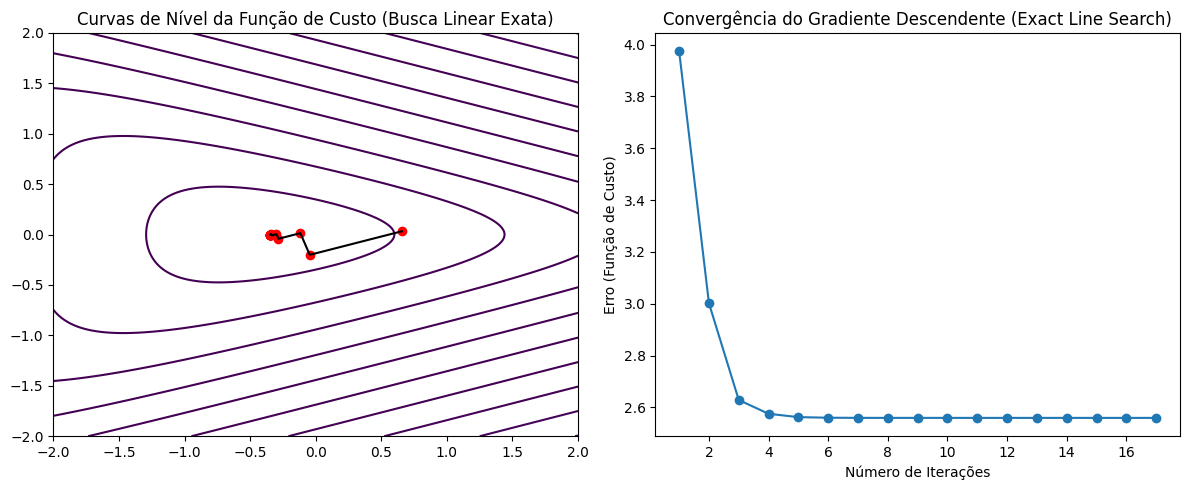

In [ ]:
# Configurações iniciais
x_0 = np.array([1.0, -1.0])

eta = 1e-5

# Executando o gradiente descendente com Exact Line Search
x_values, cost_values_exact = gradient_descent_exact_line_search(x_0, eta)

x1 = np.linspace(-2, 2, 1000)
x2 = np.linspace(-2, 2, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = cost_function(np.array([X1, X2]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contour(X1, X2, Z, levels=np.logspace(-1, 5, 20))
x_values_exact_ls = np.array(x_values)
plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='black')
plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
plt.title('Curvas de Nível da Função de Custo (Busca Linear Exata)')

# Plotando o gráfico do erro em função do número de iterações
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cost_values_exact) + 1), cost_values_exact, marker='o')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro (Função de Custo)')
plt.title('Convergência do Gradiente Descendente (Exact Line Search)')

plt.tight_layout()
plt.savefig("func2_gdeline.png",dpi=300)
plt.show()

In [ ]:

# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')

# Testando diferentes valores de learning rate e gamma
learning_rates = [ 0.01,0.1, 0.001, 0.2]
gammas = [0.1, 1, 10]

for lr in learning_rates:
    for gamma in gammas:
        # Configurações iniciais
        x_0 = np.array([1.0, -1.0])
        eta = 1e-5

        # Executando o gradiente descendente com Busca Linear Exata
        _, cost_values = gradient_descent_exact_line_search(x_0, eta)

        # Verificando o custo final
        final_cost = cost_values[-1]

        # Armazenando os melhores parâmetros
        if final_cost < best_cost:
            best_cost = final_cost
            best_params = {'learning_rate': lr, 'gamma': gamma}

print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

Melhores parâmetros encontrados: {'learning_rate': 0.01, 'gamma': 0.1}
Custo mínimo: 2.5592666966683018


<ipython-input-80-354bb144775b>:3: RuntimeWarning: overflow encountered in exp
  return np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)


## BACKING TRACKING LINE SEARCH

In [ ]:

# Backtracking Line Search
def backtracking_line_search(x, grad, alpha=0.1, beta=0.7):
    t = 1.0
    while cost_function(x - t * grad) > cost_function(x) - alpha * t * np.dot(grad, grad):
        t *= beta
    return t

# Gradiente Descendente com Exact Line Search
def gradient_descent_backtracking_line_search(x_0, eta, alpha=0.1, beta=0.7):
    x_values = []
    cost_values = []

    x = x_0
    while vector_norm(gradient(x)) > eta:

        grad = gradient(x)

        # Função de custo unidimensional para encontrar o tamanho exato do passo
        #cost_unidimensional = lambda t: cost_function(x - t * grad)

        # Encontrar o tamanho exato do passo usando o método minimize_scalar da SciPy
        t = backtracking_line_search(x, grad)

        x = x - t * grad
        x_values.append(x)
        cost_values.append(cost_function(x))

    return x_values, cost_values



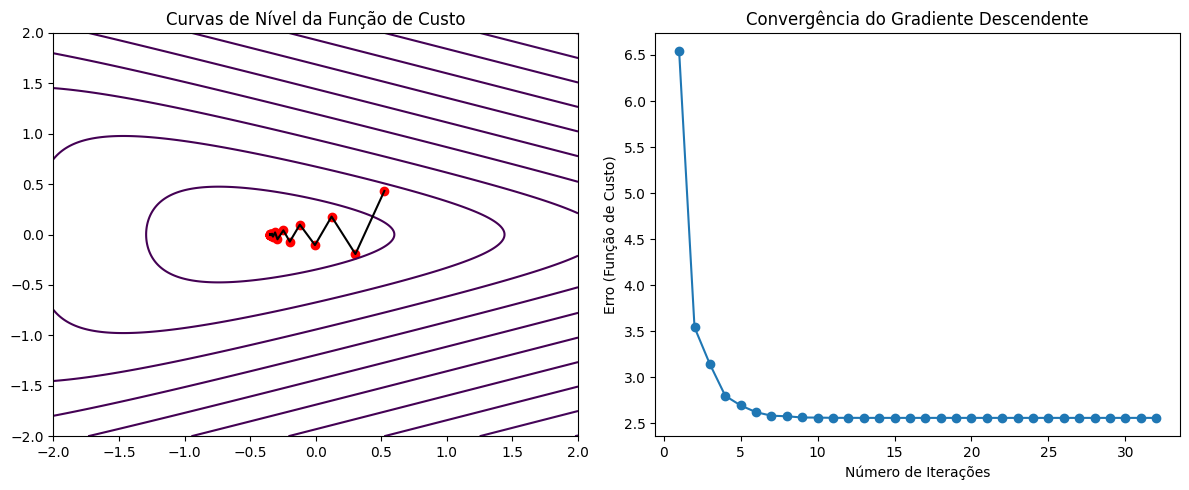

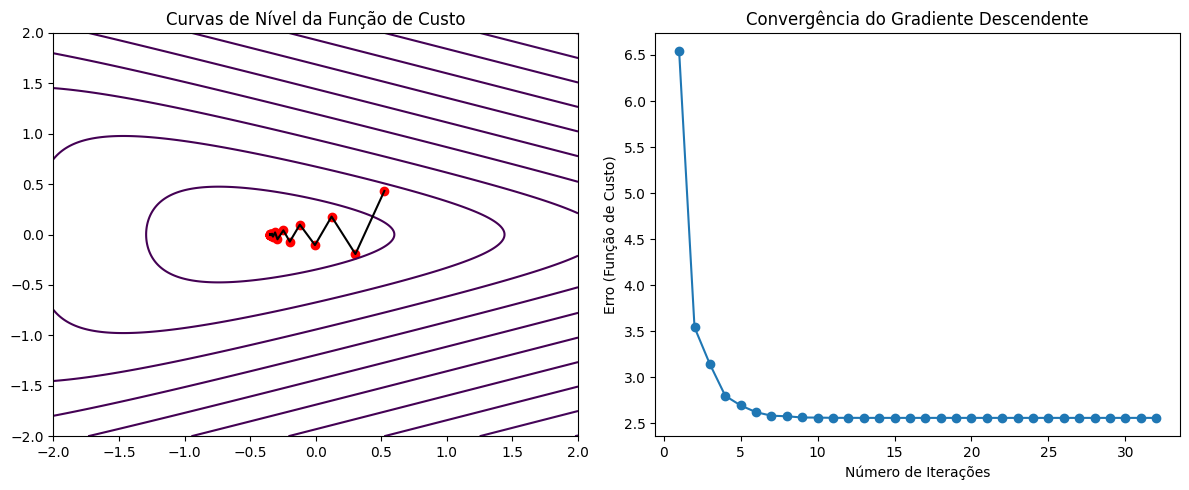

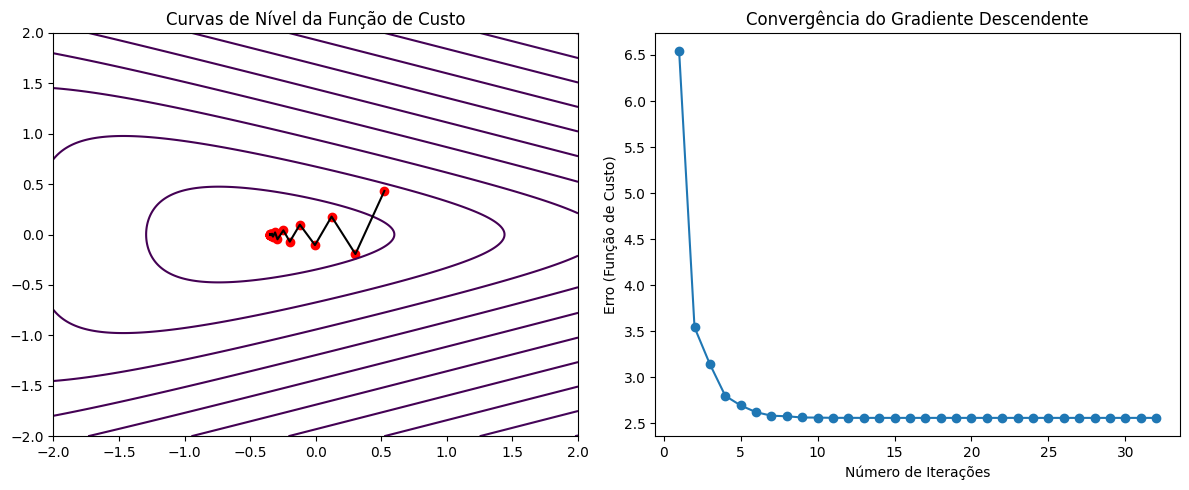

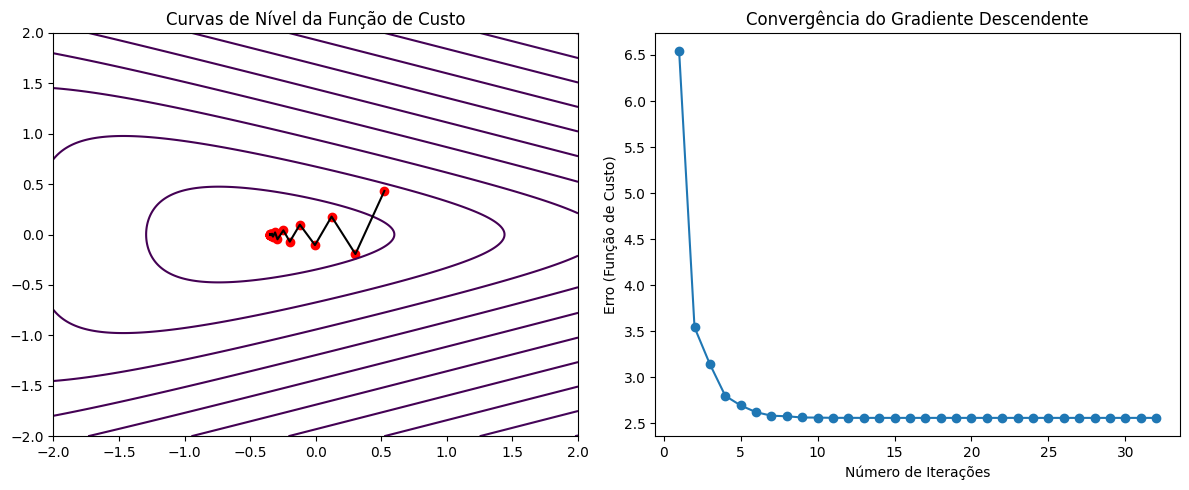

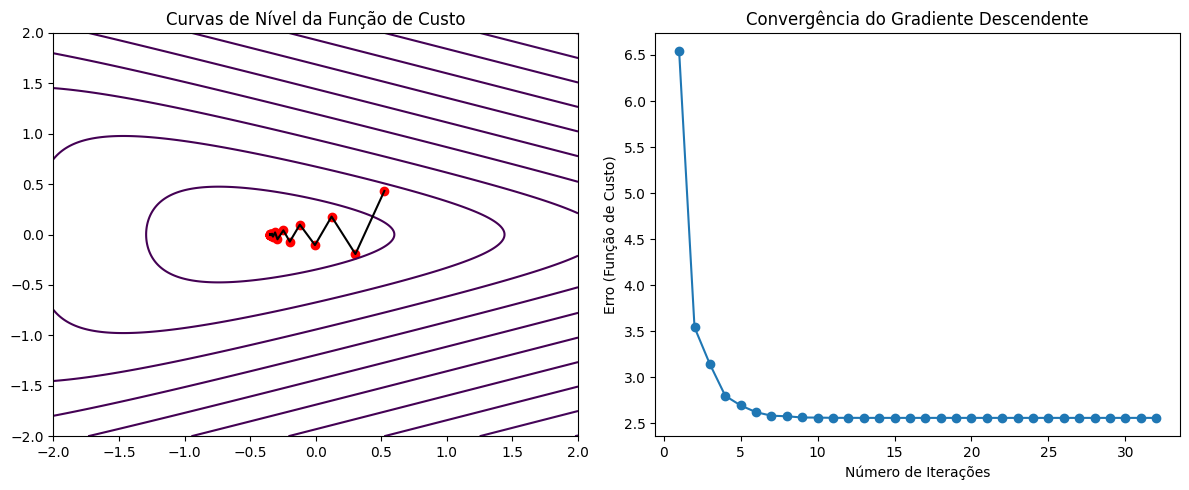

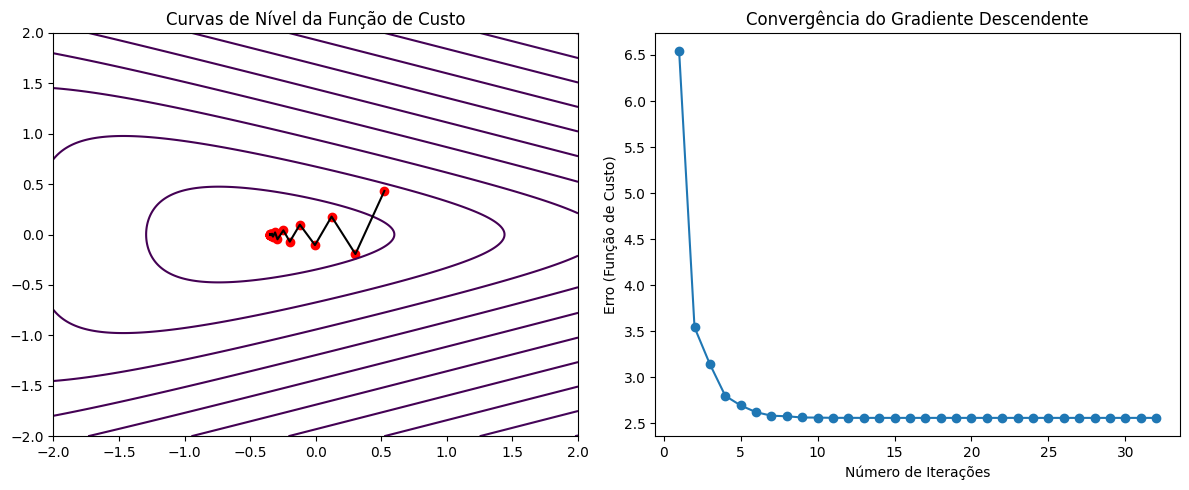

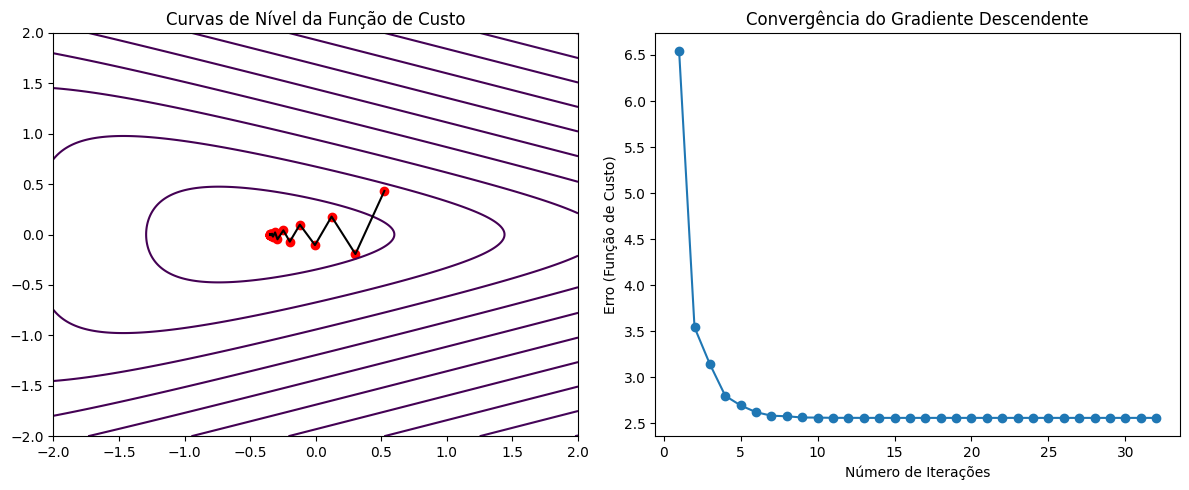

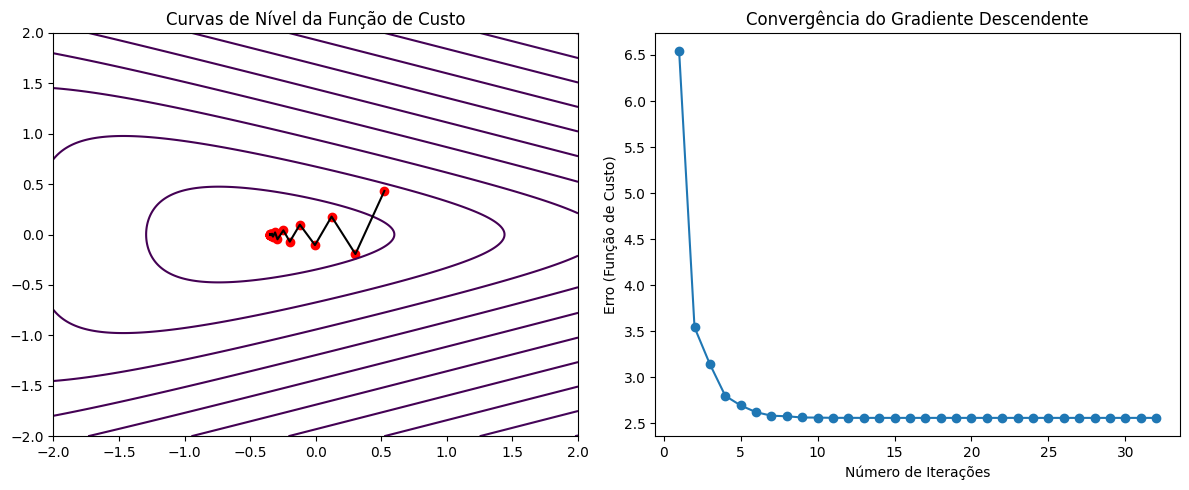

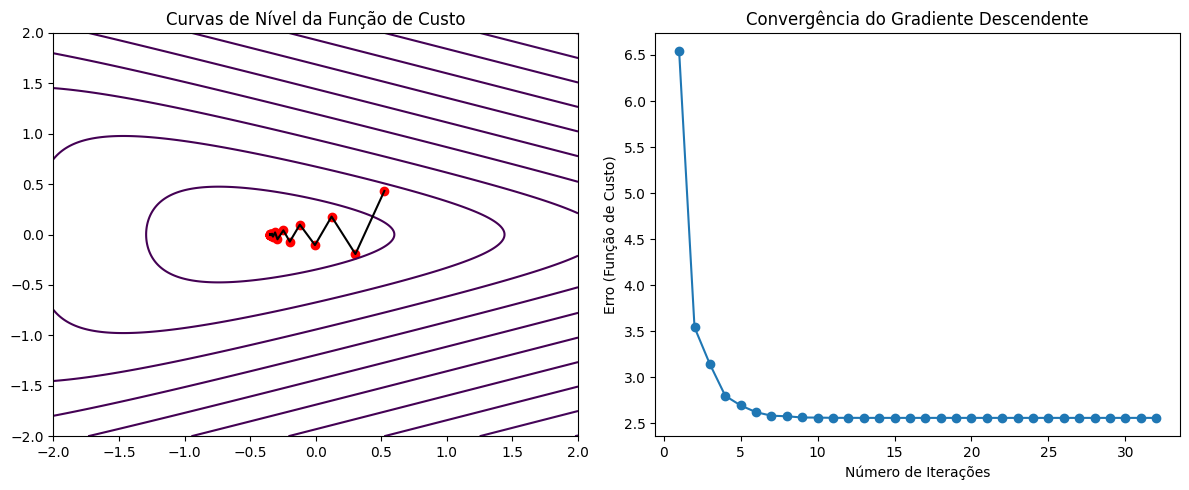

Melhores parâmetros encontrados: {'alpha': 0.5, 'gamma': 0.8}
Custo mínimo: 2.5592666966594706


In [ ]:
# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')
# Configurações iniciais
x_0 = np.array([1.0, -1.0])
eta = 1e-5

for alpha in alphas:
  for beta in betas:
    # Executando o gradiente descendente com Line Search e Backtracking
    x_values, cost_values_ls = gradient_descent_backtracking_line_search(x_0, eta, alpha=alpha, beta=beta)

    final_cost = cost_values_ls[-1]

        # Armazenando os melhores parâmetros
    if final_cost < best_cost:
        best_cost = final_cost
        best_params = {'alpha': alpha, 'gamma': beta}


    x1 = np.linspace(-2, 2, 1000)
    x2 = np.linspace(-2, 2, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    Z = cost_function(np.array([X1, X2]))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.contour(X1, X2, Z, levels=np.logspace(-1, 5, 20))
    x_values_exact_ls = np.array(x_values)
    plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='black')
    plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
    plt.title('Curvas de Nível da Função de Custo')

    # Plotando o gráfico do erro em função do número de iterações
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cost_values_ls) + 1), cost_values_ls, marker='o')
    plt.xlabel('Número de Iterações')
    plt.ylabel('Erro (Função de Custo)')
    plt.title('Convergência do Gradiente Descendente')

    plt.tight_layout()
    plt.savefig("func_2_gdbtracking.png", dpi=300)
    plt.show()
print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

## Decida mais ingreme

### Decida mais ingreme com exact line

In [ ]:

def steepest_descent_exact_line(x,  P, learning_rate=0.1, tol=1e-5, max_iterations=100):
    iteration = 0
    norm_gradient_values = []
    x_values = []

    while iteration < max_iterations:
        grad = gradient(x)
        steepest_gradient_direction = quadratic_norm(grad, P)
        norm_grad = np.linalg.norm(steepest_gradient_direction)

        if norm_grad < tol:
            break

        # Backtracking line search
        t = exact_line_search(x, steepest_gradient_direction)

        x = x - t * steepest_gradient_direction
        x_values.append(x)
        norm_gradient_values.append(norm_grad)
        iteration += 1

    return x, cost_function(x), norm_gradient_values, x_values




Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46570817e-01 -2.05075859e-07]
Valor mínimo da função de custo: 2.5592666966683018
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46571630e-01 -7.12861691e-08]
Valor mínimo da função de custo: 2.559266696663161
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46572364e-01  8.18297470e-07]
Valor mínimo da função de custo: 2.559266696663996
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46560931e-01 -1.17212460e-07]
Valor mínimo da função de custo: 2.5592666968633653


<ipython-input-80-354bb144775b>:3: RuntimeWarning: overflow encountered in exp
  return np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)


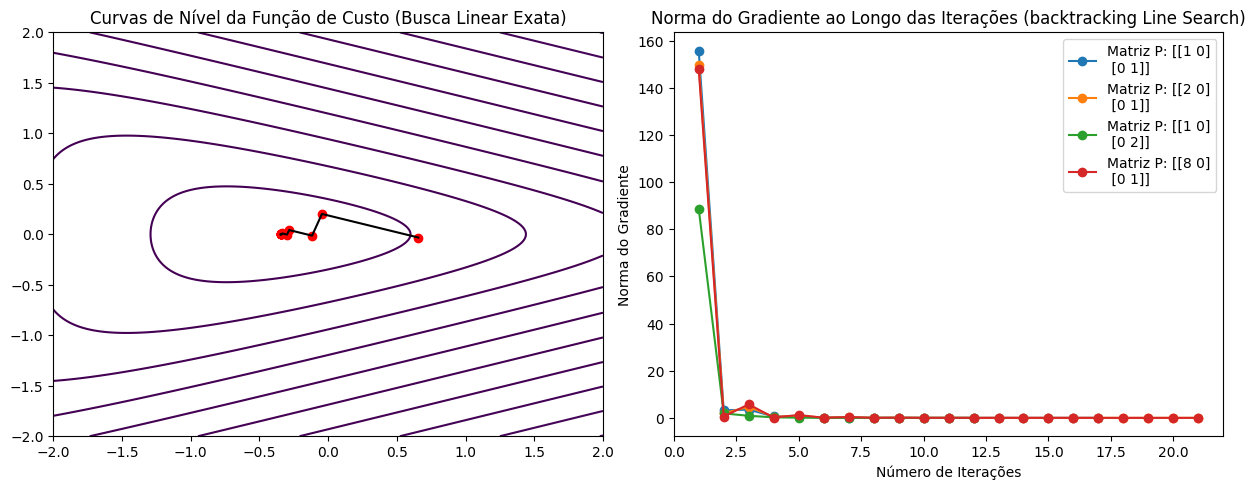

In [ ]:
# Experimente diferentes matrizes P
P_values = [np.diag([1, 1]), np.diag([2, 1]), np.diag([1, 2]), np.diag([8,1])]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
for P in P_values:
    initial_point = np.array([1.0, 1.0])
    optimal_x, min_cost, norm_gradient_values, x_values_exact_ls = steepest_descent_exact_line(initial_point,  P=P)

    print(f"Matriz P: \n{P}")
    print(f"Ponto ótimo encontrado: {optimal_x}")
    print(f"Valor mínimo da função de custo: {min_cost}")

    # Plotar a norma do gradiente ao longo das iterações
    plt.plot(range(1, len(norm_gradient_values) + 1), norm_gradient_values, marker='o', label=f'Matriz P: {P}')

plt.title('Norma do Gradiente ao Longo das Iterações (backtracking Line Search)')
plt.xlabel('Número de Iterações')
plt.ylabel('Norma do Gradiente')
plt.legend()

# Configurações iniciais
x_0 = np.array([1.0, 1.0])
gamma = 10
eta = 1e-5



# Plotando o gráfico do erro em função do número de iterações

_, _, _, x_values_exact_ls  = steepest_descent_exact_line(x_0, P=P_values[0])

plt.tight_layout()


x1 = np.linspace(-2, 2, 1000)
x2 = np.linspace(-2, 2, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = cost_function(np.array([X1, X2]))




plt.subplot(1, 2, 1)
plt.contour(X1, X2, Z, levels=np.logspace(-1, 5, 20))
x_values_exact_ls = np.array(x_values_exact_ls)
plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='black')
plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
plt.title('Curvas de Nível da Função de Custo (Busca Linear Exata)')
plt.show()

### Decida mais ingreme com backtracking

In [ ]:

def steepest_descent_backtracking_line(x,  P,alpha,beta, learning_rate=0.1, tol=1e-5, max_iterations=100):
    iteration = 0
    norm_gradient_values = []
    x_values = []

    while iteration < max_iterations:
        grad = gradient(x)
        steepest_gradient_direction = quadratic_norm(grad, P)
        norm_grad = np.linalg.norm(steepest_gradient_direction)

        if norm_grad < tol:
            break

        # Backtracking line search
        t = backtracking_line_search(x, steepest_gradient_direction,alpha,beta)

        x = x - t * steepest_gradient_direction
        x_values.append(x)
        norm_gradient_values.append(norm_grad)
        iteration += 1

    return x, cost_function(x), norm_gradient_values, x_values



alpha$: 0.5 
beta: 0.8 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46571129e-01 -2.85064252e-07]
Valor mínimo da função de custo: 2.559266696666438
alpha$: 0.5 
beta: 0.8 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.4657667e-01 -7.5789798e-07]
Valor mínimo da função de custo: 2.5592666966736566
alpha$: 0.5 
beta: 0.8 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46573213e-01 -9.99733947e-07]
Valor mínimo da função de custo: 2.559266696664153
alpha$: 0.5 
beta: 0.8 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46552662e-01  5.12441413e-08]
Valor mínimo da função de custo: 2.559266697218703


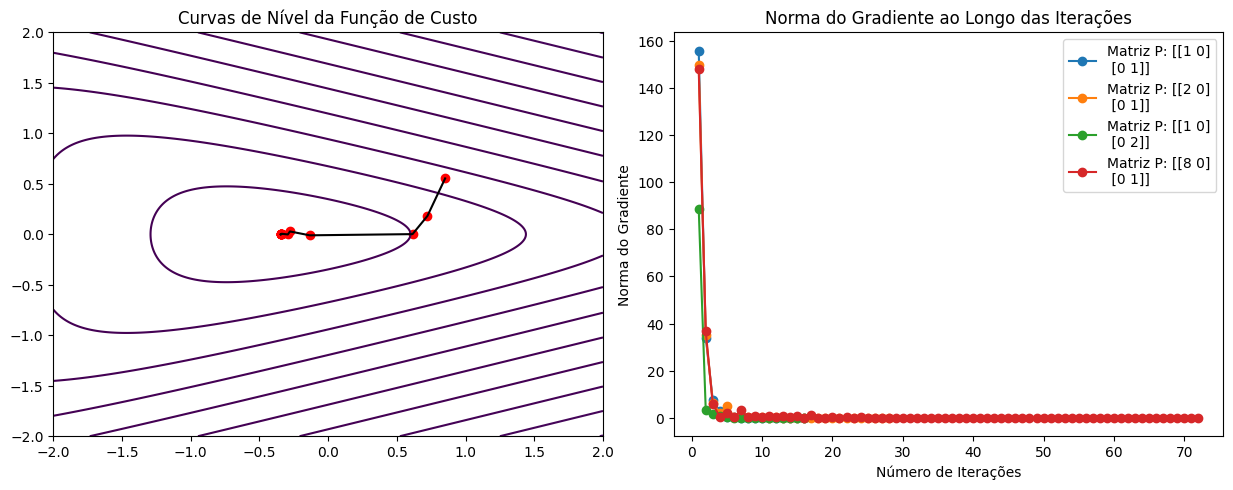

alpha$: 0.5 
beta: 0.08 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46570081e-01 -7.52449066e-18]
Valor mínimo da função de custo: 2.5592666966739777
alpha$: 0.5 
beta: 0.08 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46569397e-01 -8.46036894e-08]
Valor mínimo da função de custo: 2.559266696680761
alpha$: 0.5 
beta: 0.08 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46570153e-01 -3.86670793e-17]
Valor mínimo da função de custo: 2.559266696673334
alpha$: 0.5 
beta: 0.08 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-0.34267108  0.00105542]
Valor mínimo da função de custo: 2.559292624385293


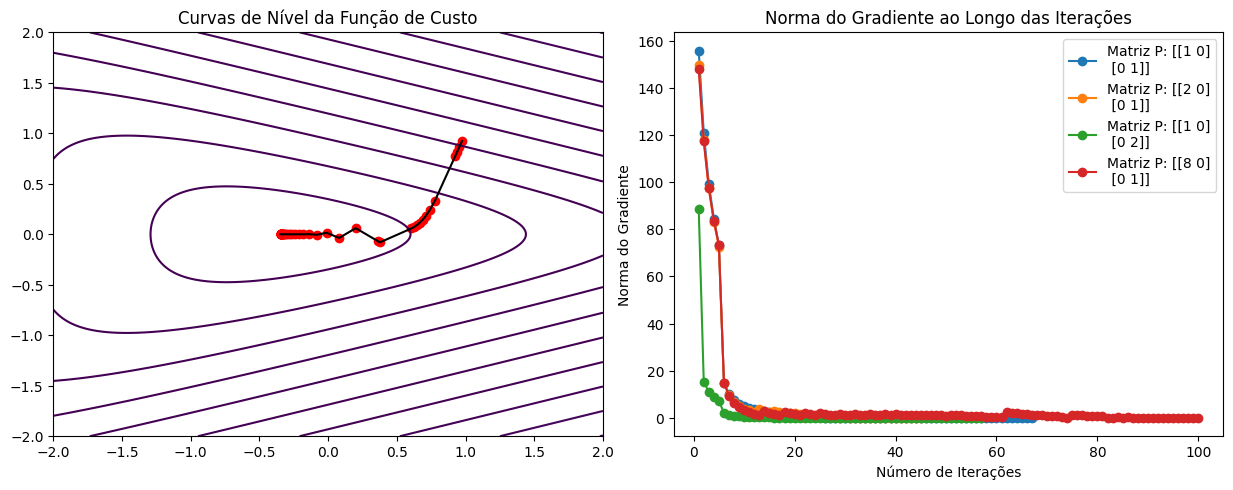

alpha$: 0.5 
beta: 0.008 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [2.15495221e-02 1.48566998e-05]
Valor mínimo da função de custo: 2.734642888665692
alpha$: 0.5 
beta: 0.008 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-0.37571305 -0.02264966]
Valor mínimo da função de custo: 2.5632236605836507
alpha$: 0.5 
beta: 0.008 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-0.24233918  0.00034016]
Valor mínimo da função de custo: 2.5731830038032437
alpha$: 0.5 
beta: 0.008 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-0.0554263  -0.08222507]
Valor mínimo da função de custo: 2.7208596161676466


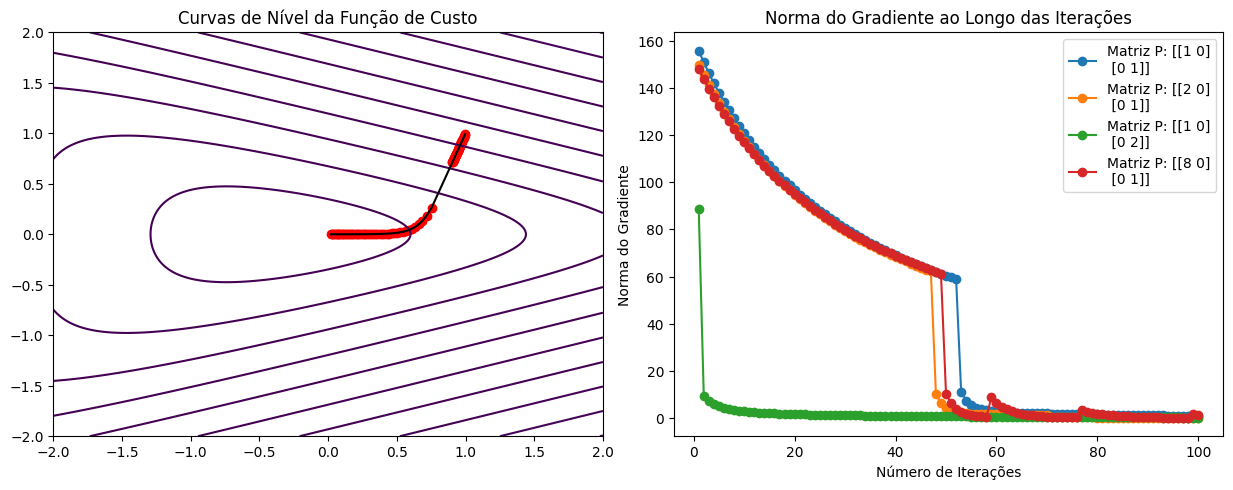

alpha$: 0.25 
beta: 0.8 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46572154e-01  5.59196721e-07]
Valor mínimo da função de custo: 2.5592666966626556
alpha$: 0.25 
beta: 0.8 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46570458e-01 -7.23971129e-07]
Valor mínimo da função de custo: 2.5592666966737885
alpha$: 0.25 
beta: 0.8 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46573592e-01  8.89873891e-07]
Valor mínimo da função de custo: 2.5592666966627755
alpha$: 0.25 
beta: 0.8 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-0.32380912  0.00212222]
Valor mínimo da função de custo: 2.559956390259404


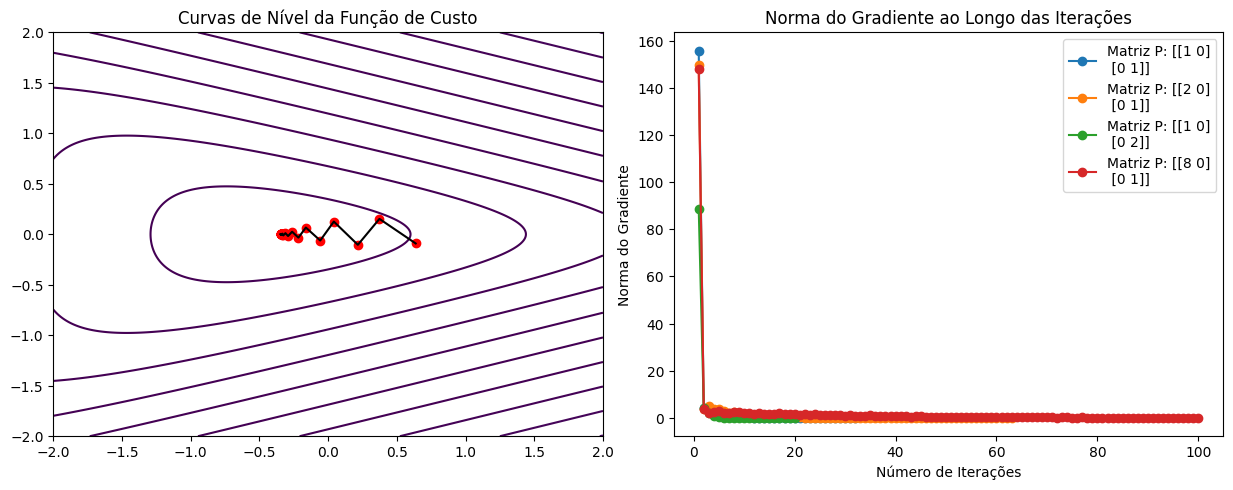

alpha$: 0.25 
beta: 0.08 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46569851e-01 -3.39184417e-18]
Valor mínimo da função de custo: 2.5592666966761106
alpha$: 0.25 
beta: 0.08 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46569262e-01 -1.58750342e-07]
Valor mínimo da função de custo: 2.559266696682333
alpha$: 0.25 
beta: 0.08 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46570452e-01 -2.91828195e-14]
Valor mínimo da função de custo: 2.5592666966708184
alpha$: 0.25 
beta: 0.08 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46534170e-01  1.03872656e-05]
Valor mínimo da função de custo: 2.5592666992680115


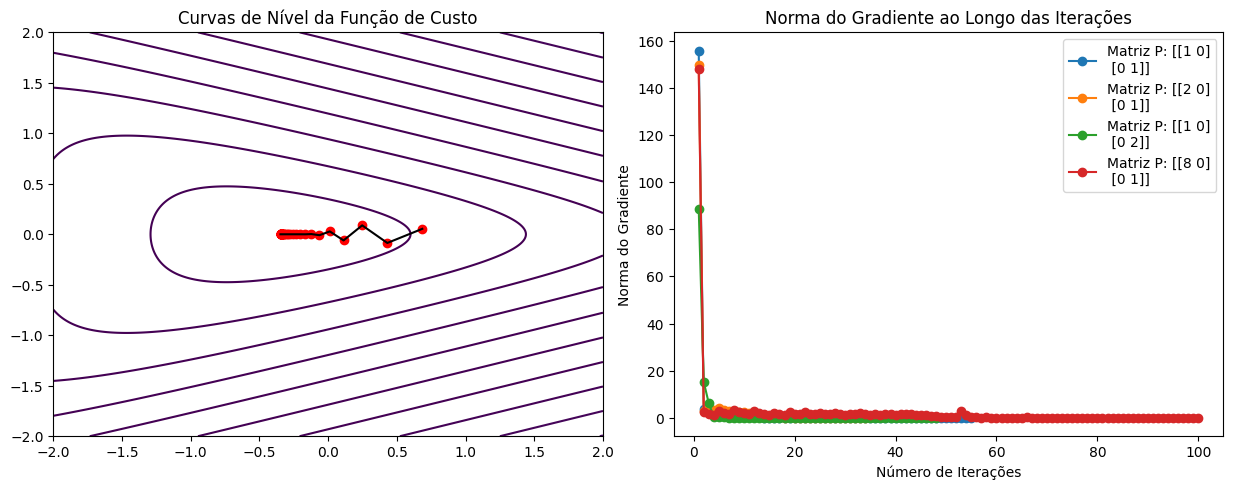

alpha$: 0.25 
beta: 0.008 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-2.22562684e-01 -3.64360739e-08]
Valor mínimo da função de custo: 2.5789710330993367
alpha$: 0.25 
beta: 0.008 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-0.36498929  0.0168873 ]
Valor mínimo da função de custo: 2.5613132319561864
alpha$: 0.25 
beta: 0.008 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-0.24233918  0.00034016]
Valor mínimo da função de custo: 2.5731830038032437
alpha$: 0.25 
beta: 0.008 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-0.229115   0.0505917]
Valor mínimo da função de custo: 2.593548896884313


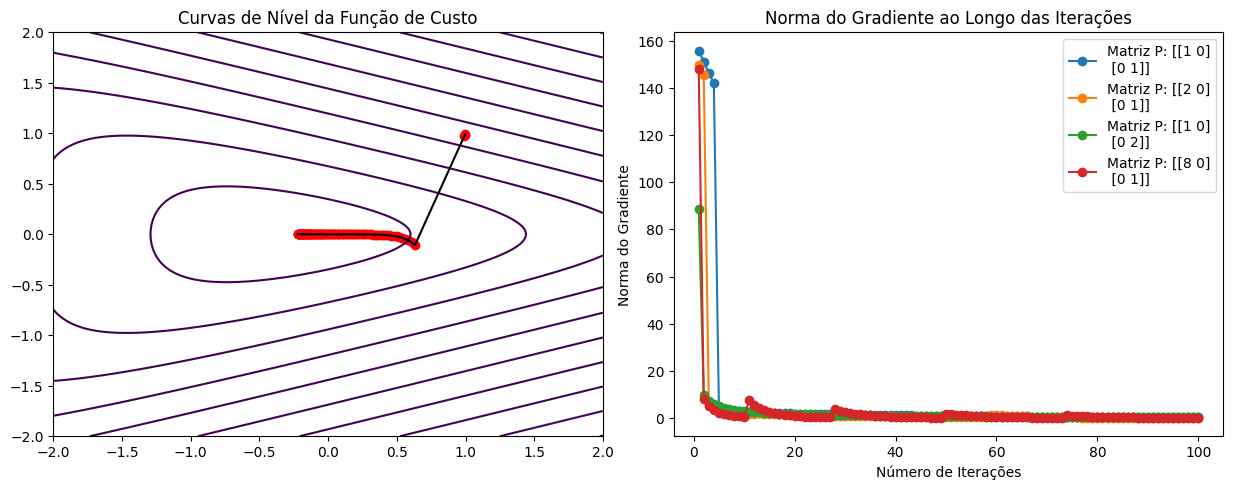

alpha$: 0.125 
beta: 0.8 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46574494e-01  4.56165026e-07]
Valor mínimo da função de custo: 2.559266696660459
alpha$: 0.125 
beta: 0.8 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46571647e-01 -8.28172110e-07]
Valor mínimo da função de custo: 2.559266696666997
alpha$: 0.125 
beta: 0.8 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46573591e-01  1.00841555e-06]
Valor mínimo da função de custo: 2.5592666966640714
alpha$: 0.125 
beta: 0.8 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-0.32451832  0.00461564]
Valor mínimo da função de custo: 2.5600145946465833


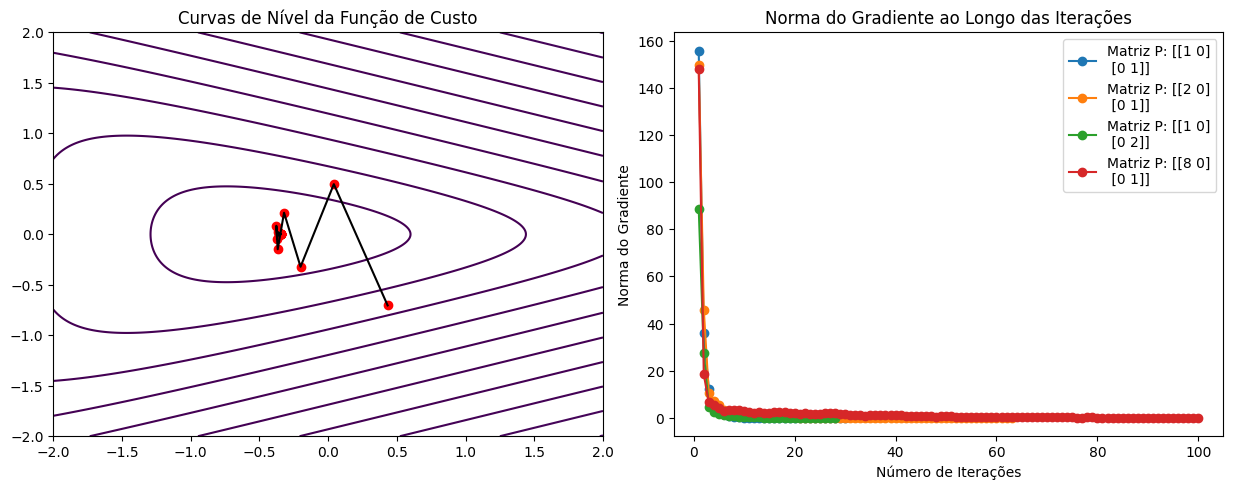

alpha$: 0.125 
beta: 0.08 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46569851e-01 -3.39184417e-18]
Valor mínimo da função de custo: 2.5592666966761106
alpha$: 0.125 
beta: 0.08 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46569251e-01 -2.25846717e-07]
Valor mínimo da função de custo: 2.5592666966825988
alpha$: 0.125 
beta: 0.08 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46570452e-01 -2.91828195e-14]
Valor mínimo da função de custo: 2.5592666966708184
alpha$: 0.125 
beta: 0.08 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46535238e-01  9.57418820e-07]
Valor mínimo da função de custo: 2.5592666985456747


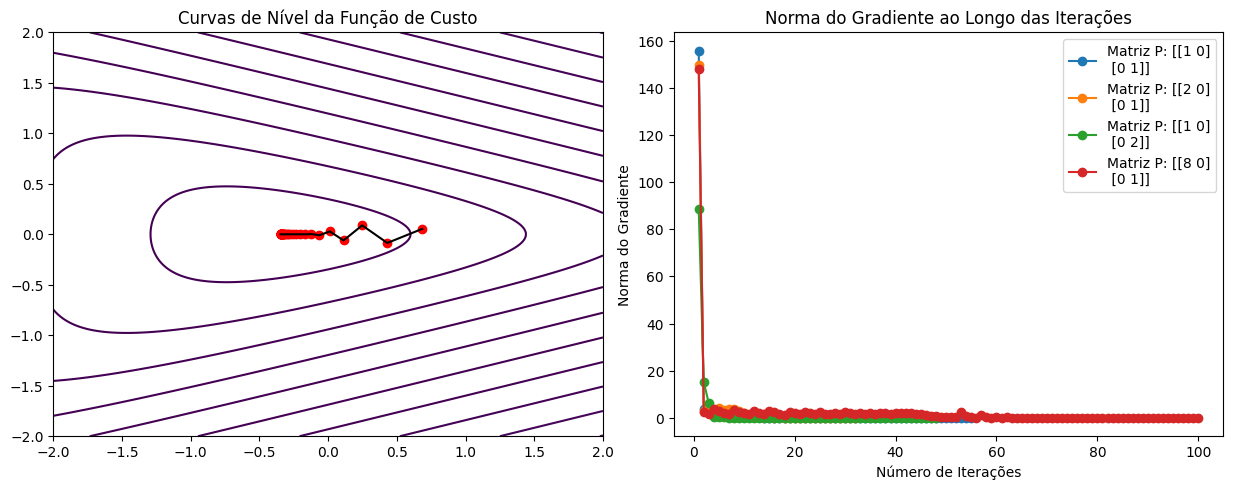

alpha$: 0.125 
beta: 0.008 
Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-2.33340650e-01 -5.54506945e-08]
Valor mínimo da função de custo: 2.5756913078876593
alpha$: 0.125 
beta: 0.008 
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-0.36516159  0.02488632]
Valor mínimo da função de custo: 2.5632111009551766
alpha$: 0.125 
beta: 0.008 
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-0.24233918  0.00034016]
Valor mínimo da função de custo: 2.5731830038032437
alpha$: 0.125 
beta: 0.008 
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-0.229115   0.0505917]
Valor mínimo da função de custo: 2.593548896884313


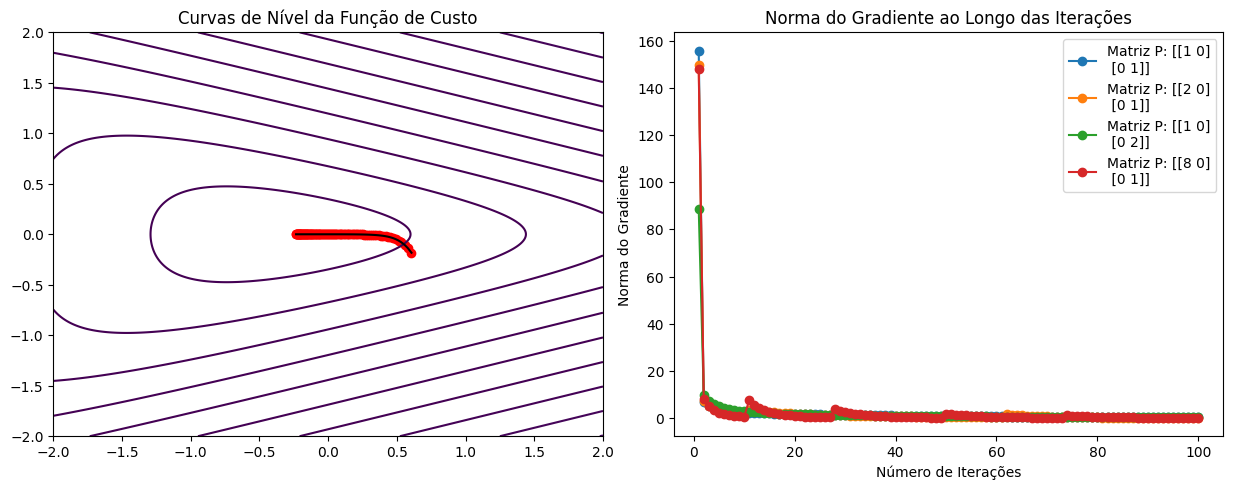

Melhores parâmetros encontrados: {'alpha': 0.25, 'gamma': 0.8, 'P': array([[1, 0],
       [0, 2]])}
Custo mínimo: 1.0056995266388574e-05


In [ ]:
# Experimente diferentes matrizes P
# Grid Search para encontrar os melhores parâmetros
best_params = None
best_cost = float('inf')

P_values = [np.diag([1, 1]), np.diag([2, 1]), np.diag([1, 2]), np.diag([8, 1])]

for alpha in alphas:
  for beta in betas:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    for P in P_values:
        initial_point = np.array([1.0, 1.0])
        optimal_x, min_cost, norm_gradient_values, x_values_exact_ls = steepest_descent_backtracking_line(initial_point,  P=P, alpha=alpha, beta=beta)
        print(f"alpha$: {alpha} ")
        print(f"beta: {beta} ")
        print(f"Matriz P: \n{P}")
        print(f"Ponto ótimo encontrado: {optimal_x}")
        print(f"Valor mínimo da função de custo: {min_cost}")

        # Plotar a norma do gradiente ao longo das iterações
        plt.plot(range(1, len(norm_gradient_values) + 1), norm_gradient_values, marker='o', label=f'Matriz P: {P}')
        final_cost = norm_gradient_values[-1]

        # Armazenando os melhores parâmetros
        if final_cost < best_cost:
            best_cost = final_cost
            best_params = {'alpha': alpha, 'gamma': beta, "P":P}

    plt.title('Norma do Gradiente ao Longo das Iterações')
    plt.xlabel('Número de Iterações')
    plt.ylabel('Norma do Gradiente')
    plt.legend()

    # Configurações iniciais
    x_0 = np.array([1.0, 1.0])
    gamma = 10
    eta = 1e-5



    # Plotando o gráfico do erro em função do número de iterações

    _, _, _, x_values_exact_ls  = steepest_descent_backtracking_line(x_0, P=P_values[0], alpha=alpha, beta=beta)

    plt.tight_layout()


    x1 = np.linspace(-2, 2, 1000)
    x2 = np.linspace(-2, 2, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    Z = cost_function(np.array([X1, X2]))




    plt.subplot(1, 2, 1)
    plt.contour(X1, X2, Z, levels=np.logspace(-1, 5, 20))
    x_values_exact_ls = np.array(x_values_exact_ls)
    plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='black')
    plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
    plt.title('Curvas de Nível da Função de Custo')
    plt.show()
print("Melhores parâmetros encontrados:", best_params)
print("Custo mínimo:", best_cost)

Matriz P: 
[[1 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46571129e-01 -2.85064252e-07]
Valor mínimo da função de custo: 2.559266696666438
Matriz P: 
[[2 0]
 [0 1]]
Ponto ótimo encontrado: [-3.4657667e-01 -7.5789798e-07]
Valor mínimo da função de custo: 2.5592666966736566
Matriz P: 
[[1 0]
 [0 2]]
Ponto ótimo encontrado: [-3.46573213e-01 -9.99733947e-07]
Valor mínimo da função de custo: 2.559266696664153
Matriz P: 
[[8 0]
 [0 1]]
Ponto ótimo encontrado: [-3.46552662e-01  5.12441413e-08]
Valor mínimo da função de custo: 2.559266697218703


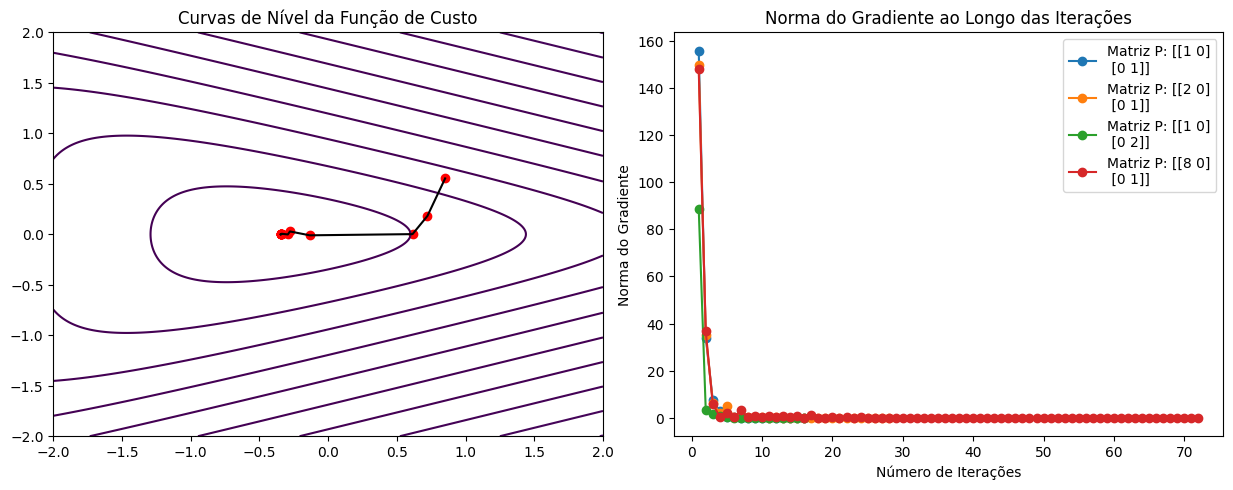

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
for P in P_values:
    initial_point = np.array([1.0, 1.0])
    optimal_x, min_cost, norm_gradient_values, x_values_exact_ls = steepest_descent_backtracking_line(initial_point,  P=P, alpha=0.5, beta=0.8)

    print(f"Matriz P: \n{P}")
    print(f"Ponto ótimo encontrado: {optimal_x}")
    print(f"Valor mínimo da função de custo: {min_cost}")

    # Plotar a norma do gradiente ao longo das iterações
    plt.plot(range(1, len(norm_gradient_values) + 1), norm_gradient_values, marker='o', label=f'Matriz P: {P}')
    final_cost = norm_gradient_values[-1]

    # Armazenando os melhores parâmetros
    if final_cost < best_cost:
        best_cost = final_cost
        best_params = {'alpha': alpha, 'gamma': beta, "P":P}

plt.title('Norma do Gradiente ao Longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel('Norma do Gradiente')
plt.legend()

# Configurações iniciais
x_0 = np.array([1.0, 1.0])
gamma = 10
eta = 1e-5



# Plotando o gráfico do erro em função do número de iterações

_, _, _, x_values_exact_ls  = steepest_descent_backtracking_line(x_0, P=P_values[0], alpha=0.5, beta=0.8)

plt.tight_layout()


x1 = np.linspace(-2, 2, 1000)
x2 = np.linspace(-2, 2, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = cost_function(np.array([X1, X2]))




plt.subplot(1, 2, 1)
plt.contour(X1, X2, Z, levels=np.logspace(-1, 5, 20))
x_values_exact_ls = np.array(x_values_exact_ls)
plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='black')
plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
plt.title('Curvas de Nível da Função de Custo')
plt.savefig('func2_stp_optimal3.png', dpi=300)
plt.show()

## Metodo de Newton

In [ ]:
# Matriz Hessiana da função de custo
def hessian(x):
    h11 = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)
    h12 = 3 * (np.exp(x[0] + 3*x[1] - 0.1) - np.exp(x[0] - 3*x[1] - 0.1))
    h21 = h12
    h22 = 9 * (np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1))

    return np.array([[h11, h12],
                     [h21, h22]])

In [ ]:


# Método de Newton com busca de retrocesso
def newton_backtracking(x_0,alpha,beta, epsilon=1e-5, max_iterations=100):
    x = np.array(x_0, dtype=float)
    x_values = [x]
    cost_values = []

    while True:
        grad = gradient(x)
        hess = hessian(x)
        hess_inv = np.linalg.inv(hess)


        lambda_2 = grad.T @ hess_inv @ grad
        # Direção de descida
        direction = -hess_inv @ grad

        if lambda_2/2 <= epsilon:
          break
        # Busca de retrocesso
        t = backtracking_line_search(x, grad, alpha, beta)

        # Atualiza a posição
        x = x + t * direction
        x_values.append(x)
        cost_values.append(cost_function(x))


    return x_values, cost_values


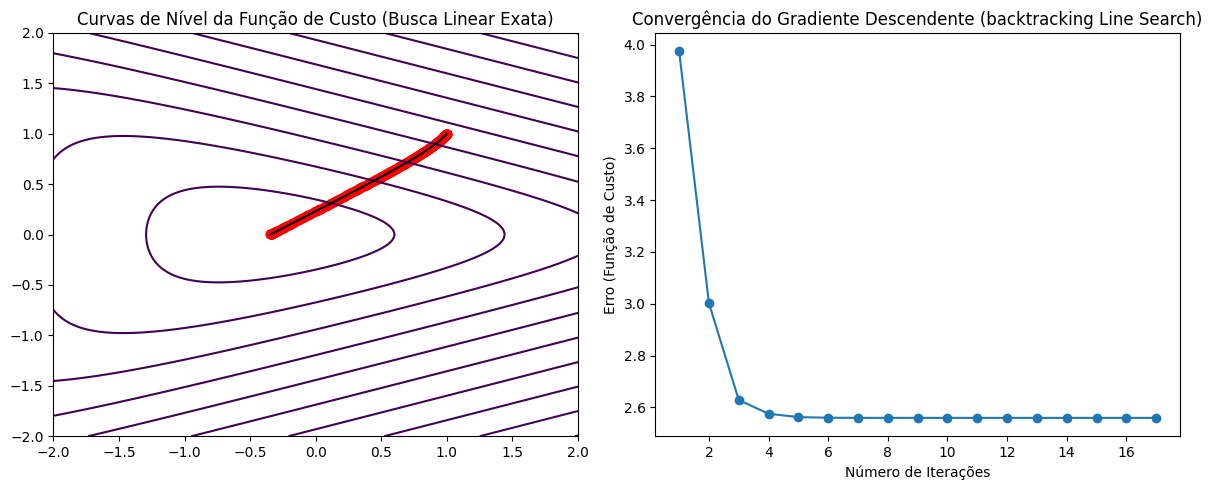

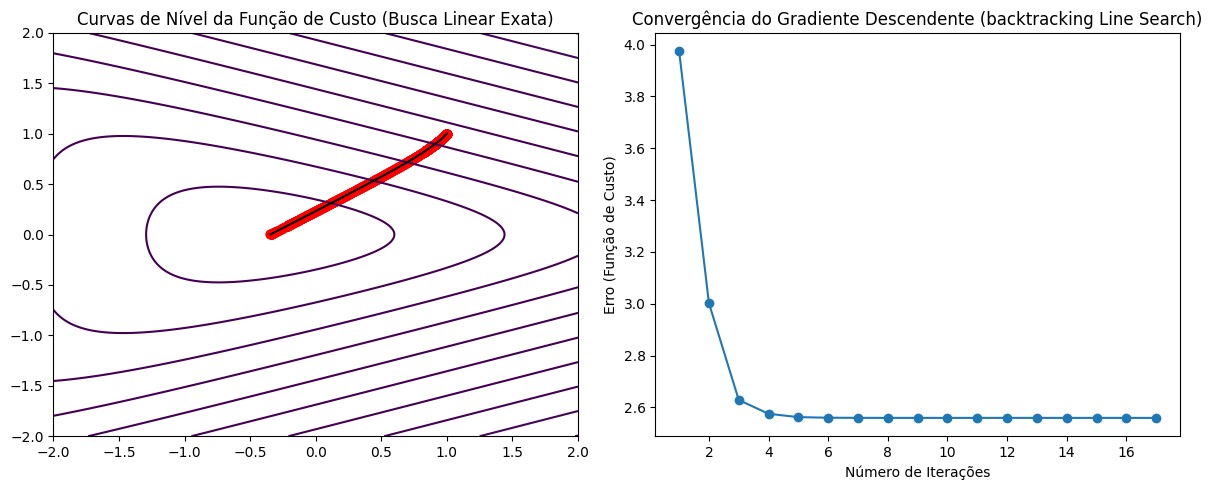

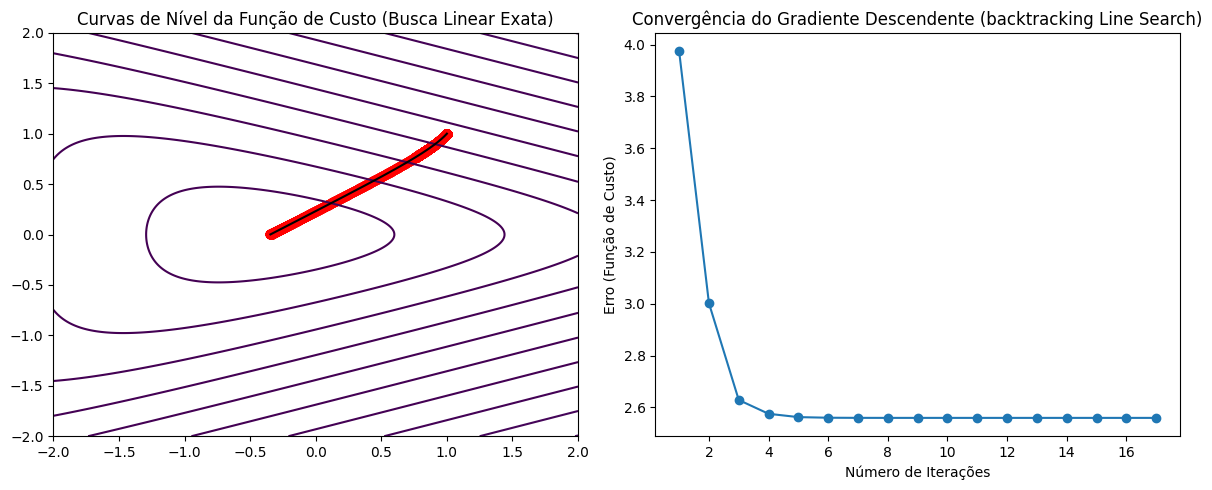

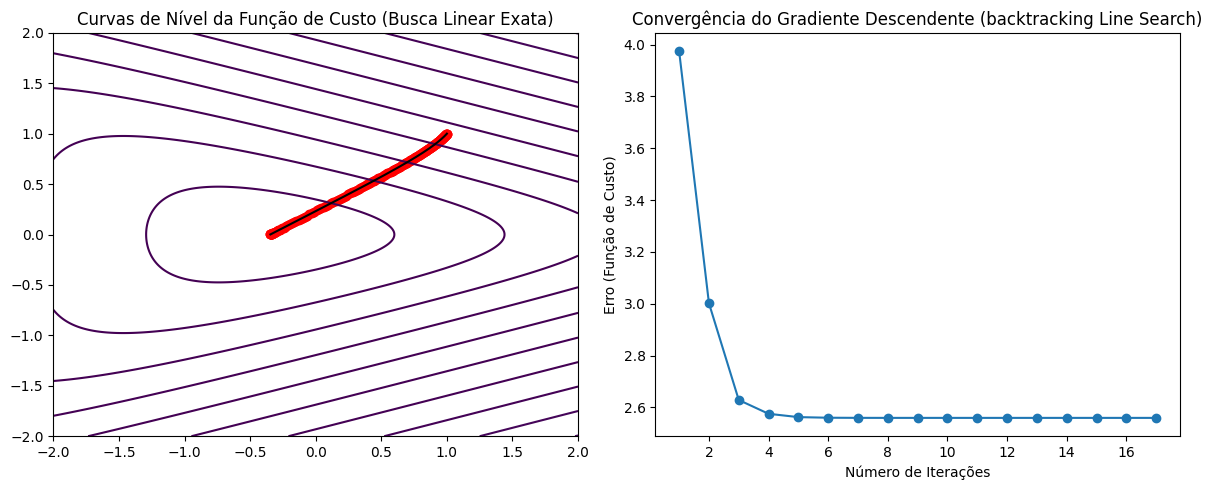

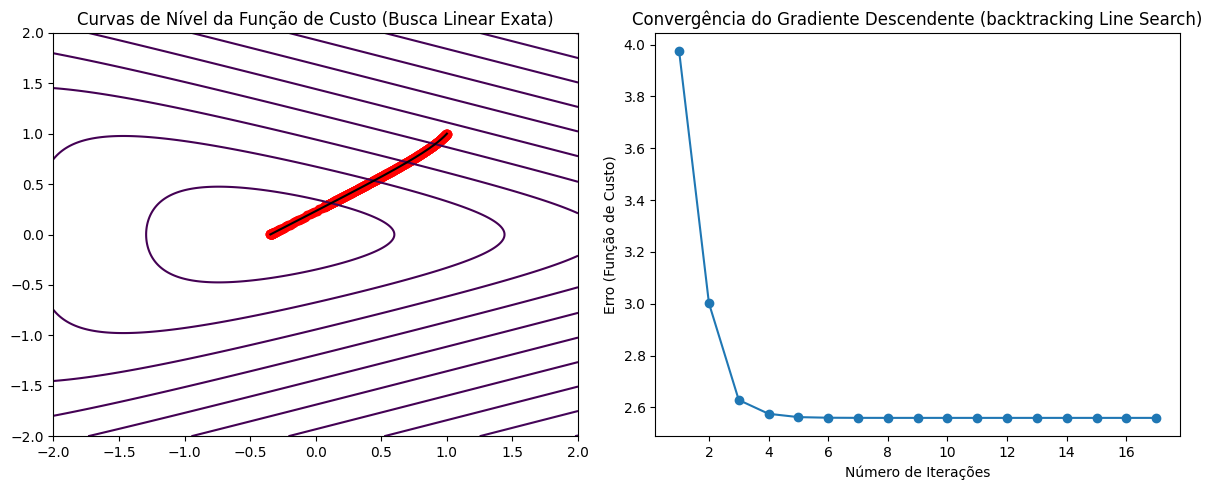

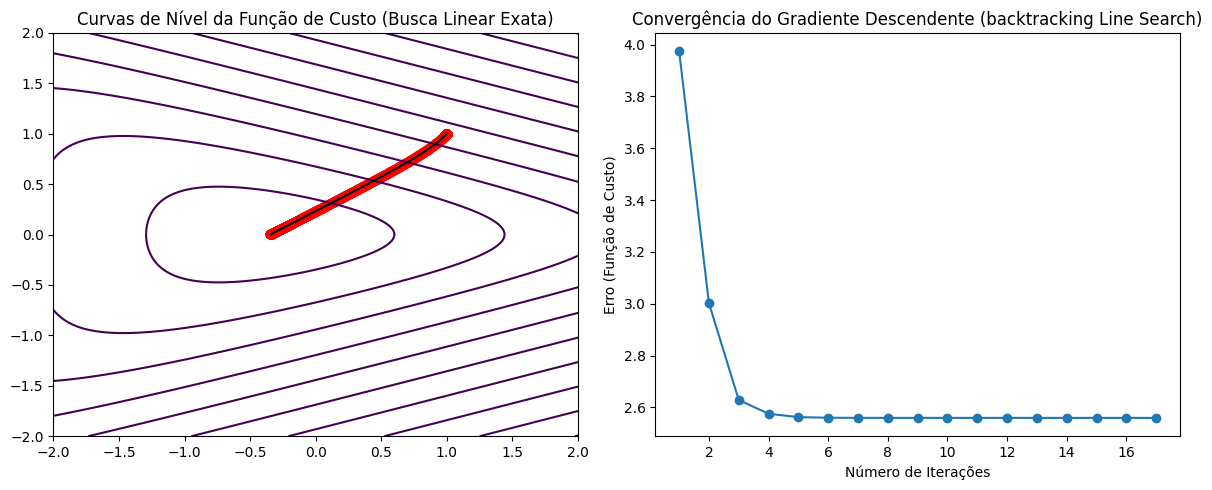

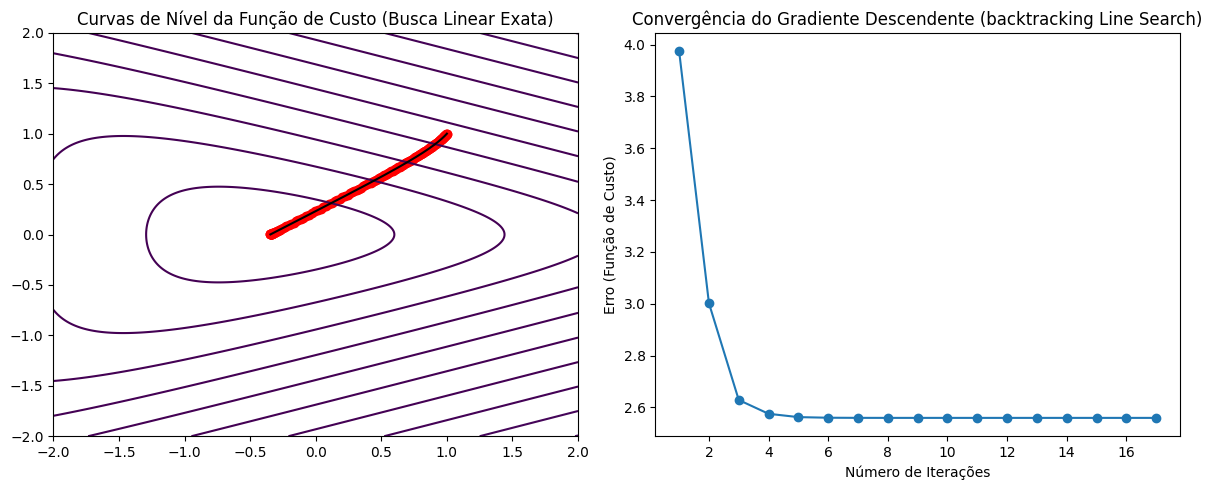

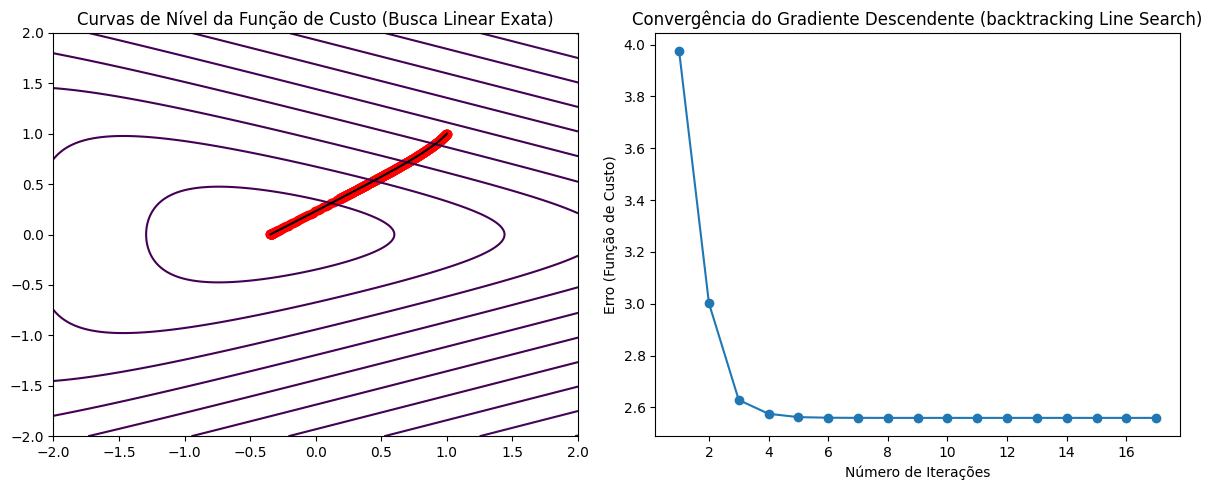

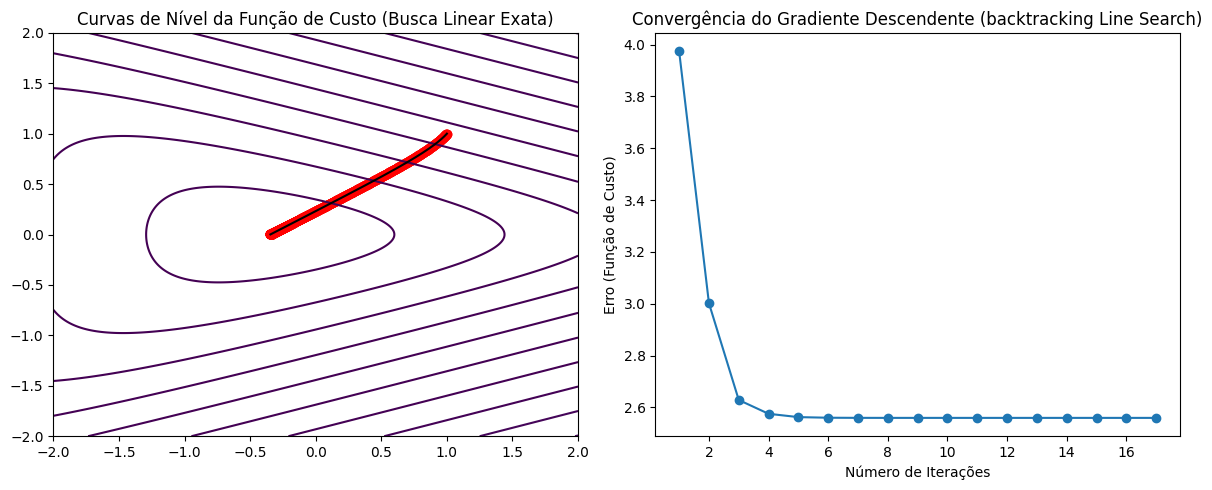

In [ ]:

# Parâmetros:
for alpha in alphas:
  for beta in betas:
    initial_point = [1.0, 1.0]

    # Executa o método de Newton com busca de retrocesso
    x_values, cost_values = newton_backtracking(initial_point,alpha,beta)
    final_cost = norm_gradient_values[-1]

    # Armazenando os melhores parâmetros
    if final_cost < best_cost:
        best_cost = final_cost
        best_params = {'alpha': alpha, 'beta': beta}
    x1 = np.linspace(-2, 2, 1000)
    x2 = np.linspace(-2, 2, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    Z = cost_function(np.array([X1, X2]))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.contour(X1, X2, Z, levels=np.logspace(-1, 5, 20))
    x_values_exact_ls = np.array(x_values)
    plt.plot(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='black')
    plt.scatter(x_values_exact_ls[:, 0], x_values_exact_ls[:, 1], c='red')
    plt.title('Curvas de Nível da Função de Custo (Busca Linear Exata)')

    # Plotando o gráfico do erro em função do número de iterações
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cost_values_exact) + 1), cost_values_exact, marker='o')
    plt.xlabel('Número de Iterações')
    plt.ylabel('Erro (Função de Custo)')
    plt.title('Convergência do Gradiente Descendente (backtracking Line Search)')

    plt.tight_layout()
    plt.savefig("func2_newtonMethod.png", dpi=300)
    plt.show()

# Newton Method


In [ ]:
import numpy as np

## Parte 2 : $f(x) =\sum_{i=1}^n x_i log x_i$

função de custo

In [ ]:
def cost_function(x):
    return -np.sum(x * np.log(x))


vetor gradiente

In [ ]:
# Gradiente da função objetivo
def gradient(x):
    return -(1 + np.log(x))


Hessiana

In [ ]:
# Hessiana da função objetivo
def hessian(x):
    return -np.diag(1 / x)


Restrição de igualdade

In [ ]:
# Restrições de igualdade Ax = b
def equality_constraint(x):
    return np.dot(A, x) - b

In [ ]:
# Método de Newton para otimização com restrições de igualdade
def newton_method(x_0, A, b, tol=1e-6):
    x = x_0.copy()
    x_values = [x]
    cost_per_iteration = []
    lambd = np.zeros_like(b)

    while True:
        grad = gradient(x)
        hess = hessian(x)

        # Sistema linear a ser resolvido
        system_matrix = np.block([[hess, A.T], [A, np.zeros((A.shape[0], A.shape[0]))]])
        rhs = np.concatenate([-grad, equality_constraint(x)])

        # Resolva o sistema linear
        delta = np.linalg.solve(system_matrix, rhs)

        # Atualize as variáveis
        delta_x = delta[:len(x)]
        delta_lambda = delta[len(x):]

        x += delta_x
        x_values.append(x)
        lambd += delta_lambda

        # Verifique a condição de parada
        if np.linalg.norm(delta_x) < tol:
            break

    return x, lambd, x_values


Definindo as dimensões do problema

In [ ]:
n = 150
p = 40


Gerando uma matriz aleatória A de posto completo

In [ ]:

while True:
    A = np.random.rand(p, n)
    if np.linalg.matrix_rank(A) == p:
        break

Gere um vetor positivo aleatório $\hat{x}$


In [ ]:
np.random.rand(n).shape

(150,)

In [ ]:
x_hat = np.random.uniform(low=0, high=1, size=n)

 Calculando $b = A * \hat{x}$

In [ ]:
b = np.dot(A, x_hat)


ponto de partida $x_0 = \hat{x}$

In [ ]:

x0 = x_hat.copy()

solution, lambd, x_values = newton_method(x0, A, b)

# Imprima a solução encontrada
print("Solução encontrada:")
print("x:", solution)
print("f(x):", cost_function(solution))

Solução encontrada:
x: [0.23935316 0.41788403 0.28271926 0.4506475  0.50453303 0.54904237
 0.58466264 0.53159254 0.52351263 0.82400132 0.50626316 0.26469171
 0.52596768 0.55404768 0.25283371 0.24604062 0.73344556 0.35769098
 0.37212153 0.48944111 0.33641755 0.46464657 0.68544991 0.48929741
 0.28223113 0.38009781 0.47178488 0.6259689  0.42822169 0.62963936
 0.53316271 0.3220942  0.39843179 0.41105931 0.36952412 0.38901293
 0.67493372 0.74684973 0.41488494 0.3972079  0.89412124 0.50440427
 0.36372191 0.61230818 0.48965774 0.31260117 0.66373285 0.49849873
 0.51836534 0.4154298  0.25634197 0.34571981 0.6119177  0.5771102
 0.39246483 0.30109812 0.57107291 0.43710538 0.54370388 0.43797991
 0.33775148 0.56639039 0.41667333 0.58741058 0.83687814 0.57290301
 0.41027454 0.49813142 0.5337806  0.35542401 0.23905538 0.61758129
 0.27565502 0.56769449 0.31684684 0.40902616 0.37653913 0.45481805
 0.51679141 0.31037691 0.38177294 0.5365313  0.35452853 0.87776107
 0.61080413 0.45850116 0.50268077 0.6271